# <font color=blue><strong>Formação de Ciência de Dados</strong></font>

## <font color=red><strong>Classificação de Subtipo de Câncer de Ovário UBC e Detecção de Outliers (UBC-OCEAN)</strong></font>

### <Strong>Colaboração: Adriano Santos</strong>

**Seja bem-vindo ao mundo da inteligência artificial!** Este guia te mostrará como construir e treinar um modelo de rede neural para classificar imagens de roupas usando o `TensorFlow`. 

**Mesmo que você seja novo na área,** não se preocupe! Vamos explicar tudo passo a passo, desde os conceitos básicos até a implementação do modelo. No final, você terá uma compreensão sólida de como as redes neurais funcionam e como elas podem ser usadas para resolver problemas reais.

**O que você vai aprender:**

* O que é uma rede neural e como ela funciona
* Como pré-processar imagens para treinamento
* Como construir um modelo de classificação de imagens usando o `TensorFlow`
* Como treinar e avaliar o modelo
* Como usar o modelo para classificar novas imagens

**O que você vai precisar:**

* Um computador com Python instalado
* O `TensorFlow` instalado (pode ser feito gratuitamente)
* Um conjunto de dados de imagens de roupas (pode ser encontrado online)

**Descrição:**

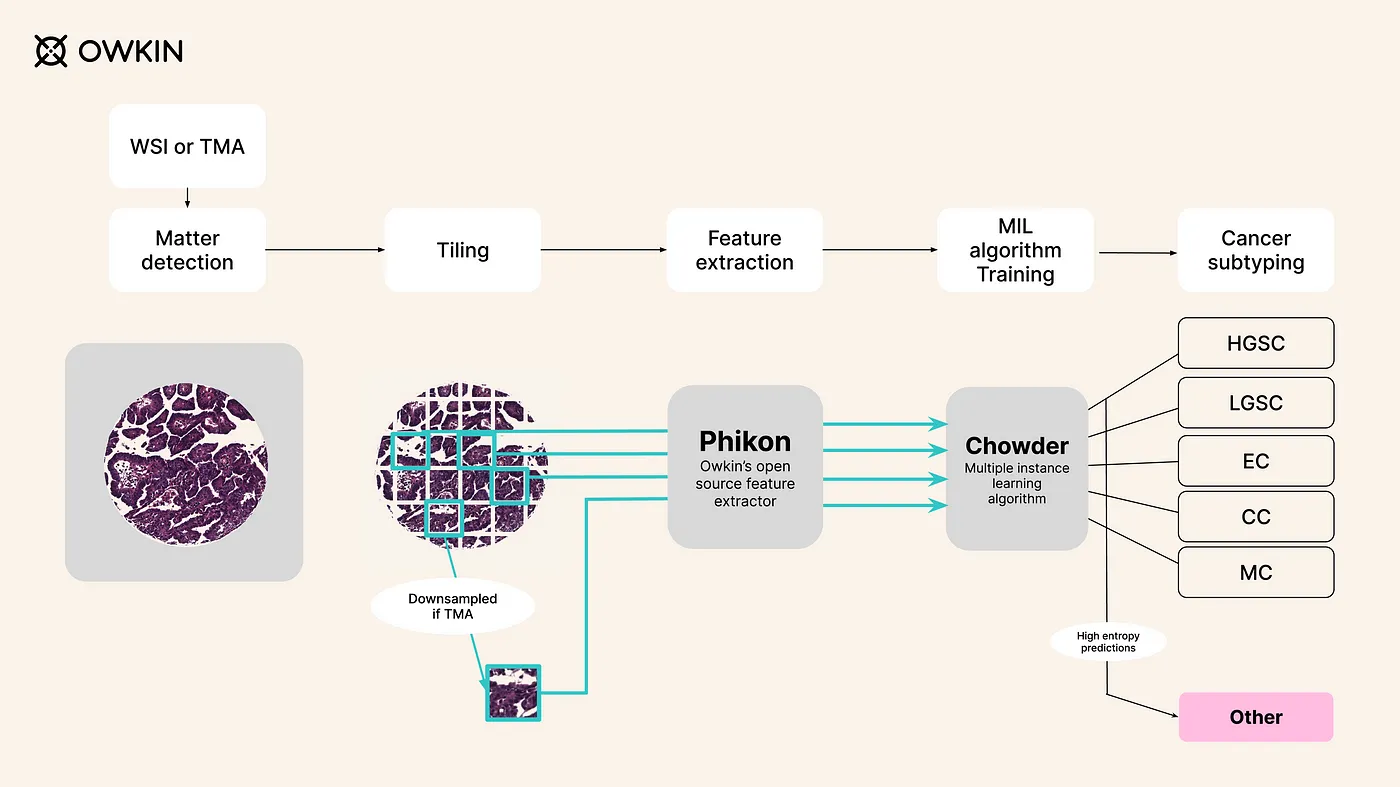

O `UBC Ovarian Cancer Subtype Classification and Outlier Detection (UBC-OCEAN)` é um sistema de classificação e detecção de outliers para câncer de ovário. Ele é usado para identificar os subtipos de câncer de ovário e determinar o risco de desenvolver a doença.

**Informações do Dataset:**

* **Nome:** Ovarian Cancer Data Set
* **Instituição:** Universidade da Colúmbia Britânica
* **Tamanho:** 238 arquivos CSV
* **Tipo:** Imagens de slides inteiros
* **Origem:** Kaggle, concurso em andamento
* **Tamanho:** 1.051 imagens
* **Tipos de imagens:**
    * `WSI` (imagens de slides inteiros): 20x de ampliação, grandes e complexas
    * `TMA` (imagens de microarranjos de tecidos): 40x de ampliação, menores e mais simples
* **Tamanho total:** 550 GB
* **Subtipos de câncer de ovário:**
    * `HGSC` (carcinoma seroso de alto grau)
    * `CC` (carcinoma de células claras)
    * `EC` (carcinoma endometrioide)
    * `LGSC` (carcinoma seroso de baixo grau)
    * `MC` (carcinoma mucinoso)

**Observações:**

* O conjunto de dados é grande e complexo, o que pode dificultar o processamento.
* As informações e insights do conjunto de dados podem ser valiosos para pesquisas sobre câncer de ovário.

**Arquivos:**

* **whole_slide_images.zip (5.4 GB):** Imagens de cortes histológicos completos
* **sample_submission.csv (238 KB):** Exemplo de arquivo de submissão para o desafio Kaggle
* **metadata.csv (4.2 KB):** Metadados para o conjunto de dados

**Objetivo do Dataset:**

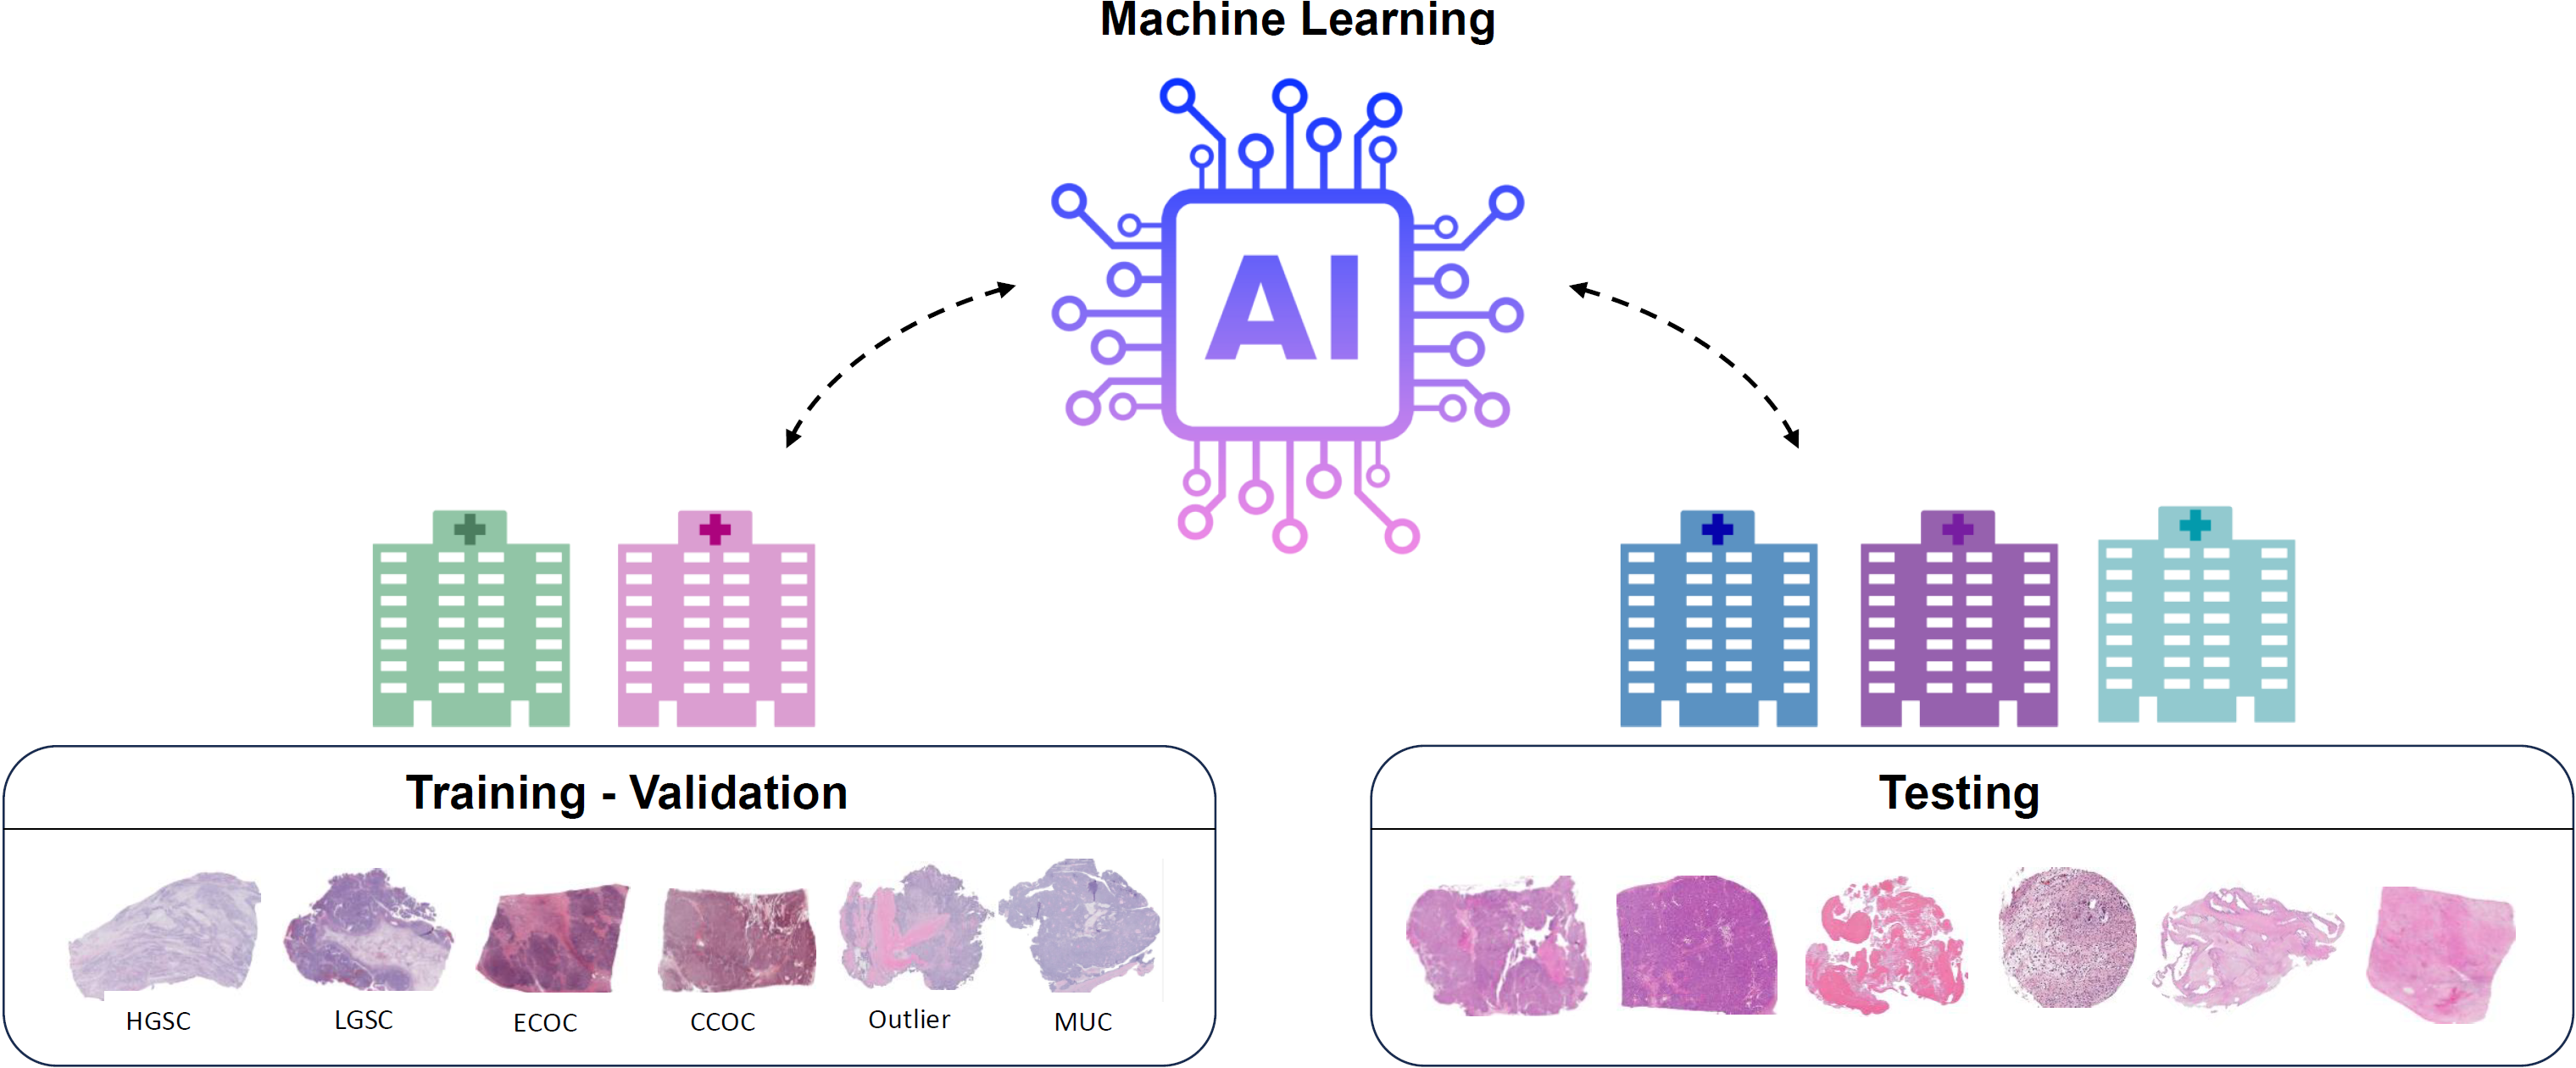

O objetivo do dataset é fornecer um recurso para o desenvolvimento de novos métodos de classificação e detecção de outliers para câncer de ovário.

**Licença:**

O dataset é licenciado sob a licença Creative Commons Attribution 4.0 International.

**Observações:**

* O dataset está disponível para download no Kaggle.
* O sistema UBC-OCEAN foi desenvolvido por pesquisadores da Universidade da Colúmbia Britânica.
* O sistema UBC-OCEAN foi publicado na revista Nature Medicine em 2023.

**Resumo:**

O dataset `UBC Ovarian Cancer Subtype Classification and Outlier Detection` é um recurso valioso para o desenvolvimento de novos métodos de classificação e detecção de outliers para câncer de ovário. O sistema UBC-OCEAN é um exemplo de como esses métodos podem ser usados para melhorar o diagnóstico e tratamento do câncer de ovário.

**Saiba Mais** : https://www.mdpi.com/2379-139X/10/1/10

<hr>

# <font color=red><strong>Inportação das Bibliotecas Essenciais</strong></strong>

### <strong>Importando as Bibliotecas e Iterando sobre Diretórios para Análise de Dados</strong>

No código a seguir, está sendo feito o pré-processamento de imagens para análise de dados utilizando Python. Primeiramente, são importadas as bibliotecas necessárias, como **numpy** para manipulação de arrays, **pandas** para trabalhar com dados tabulares, **matplotlib** e **seaborn** para visualização, **cv2** (OpenCV) para processamento de imagens e **PIL** para manipulação de imagens. Em seguida, são desabilitadas as mensagens de aviso. Posteriormente, é feita uma iteração sobre os arquivos no diretório '/kaggle/input', imprimindo o caminho de cada arquivo encontrado. Este código serve como preparação inicial para análise de imagens, configurando o ambiente e verificando os dados disponíveis para análise.

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))

/kaggle/input
/kaggle/input/UBC-OCEAN
/kaggle/input/UBC-OCEAN/test_thumbnails
/kaggle/input/UBC-OCEAN/train_images
/kaggle/input/UBC-OCEAN/train_thumbnails
/kaggle/input/UBC-OCEAN/test_images


### <strong>Gerenciamento Eficiente de Diretórios de Imagens no Projeto UBC-OCEAN</strong>

No código a seguir, está sendo definido o diretório de imagens de treinamento (**train_image_dir**) e teste (**test_image_dir**) para o conjunto de dados `UBC-OCEAN`, bem como os diretórios para as miniaturas de treinamento (**train_thumbnails_folder_path**) e teste (**test_thumbnails_folder_path**). Esses caminhos são essenciais para acessar e manipular os dados de imagens durante o processo de treinamento e teste de modelos de aprendizado de máquina ou processamento de imagens. Ao definir esses diretórios de forma clara e organizada, facilita-se a gestão e a utilização dos dados em diversas etapas do projeto, contribuindo para a eficiência e manutenção do código.

In [2]:
train_image_dir = '../input/UBC-OCEAN/train_images'
test_image_dir = '../input/UBC-OCEAN/test_images'
train_thumbnails_folder_path = '../input/UBC-OCEAN/train_thumbnails'
test_thumbnails_folder_path = '../input/UBC-OCEAN/test_thumbnails'

# <font color=red><strong>Carregar e Visualizar os Dados de Treinamento</strong></font>

### <strong>Carregando a Base de dados de Treinamento</strong>

No código a seguir, está sendo utilizado o **pandas** para carregar dados de treinamento de um arquivo CSV localizado no diretório "../input/UBC-OCEAN/train.csv". Em seguida, os primeiros 10 registros do conjunto de dados são exibidos utilizando a função **head()** do objeto **train_data**.

In [3]:
train_data = pd.read_csv("../input/UBC-OCEAN/train.csv")
train_data.head(10)

image_id label  image_width  image_height  is_tma
0         4  HGSC        23785         20008   False
1        66  LGSC        48871         48195   False
2        91  HGSC         3388          3388    True
3       281  LGSC        42309         15545   False
4       286    EC        37204         30020   False
5       431  HGSC        39991         40943   False
6       706  HGSC        75606         25965   False
7       970  HGSC        32131         18935   False
8      1020  HGSC        36585         33751   False
9      1080  HGSC        31336         23200   False

### <strong>Identificando e Processando Imagens Ausentes na Pasta `Train_thumbnails`</strong>

Como a pasta '`Train_thumbnails`' contém imagens de tamanho menor, podemos usá-las para processamento de modelos. No entanto, nem todas as imagens no conjunto de treinamento estão localizadas em '`Train_thumbnails`', por isso precisamos identificar as que faltavam e processá -las de acordo. Com isso, o código está realizado o processamento de listas para obter os nomes de arquivos. Primeiro, a lista **train_files** é criada usando uma list comprehension, onde cada nome de arquivo é extraído do diretório de imagens de treinamento (**train_image_dir**), removendo a extensão do arquivo com o método **split('.')**. Em seguida, outra lista, **thumbnails_files**, é criada da mesma maneira, mas dessa vez removendo o sufixo "`_thumbnail`" e também a extensão do arquivo. Ambas as operações são realizadas usando a função **os.listdir()** para obter os nomes de arquivo do diretório especificado.

In [4]:
train_files = [
    filename
    .split('.')[0] for filename in os
    .listdir(train_image_dir)
]

thumbnails_files = [
    filename
    .replace('_thumbnail', '')
    .split('.')[0] for filename in os
    .listdir(train_thumbnails_folder_path)
]

### <strong> Identificando Imagens Ausentes nas Miniaturas a partir dos Arquivos de Treinamento</strong>

No código a seguir, está sendo utilizado o Python para comparar conjuntos de arquivos de treinamento (`train_files`) e miniaturas (`thumbnails_files`). Primeiramente, os conjuntos são criados com a função **set** a partir das listas fornecidas. Em seguida, é realizada a operação de diferença entre conjuntos utilizando o operador "-", resultando em um conjunto contendo os IDs das imagens que estão presentes em `train_files`, mas ausentes em `thumbnails_files`. Esses IDs são então convertidos em uma lista utilizando a função **list** para facilitar a impressão. Por fim, a lista de IDs de imagem ausentes é exibida na tela, indicando quais imagens estão presentes nos arquivos de treinamento, mas não nas miniaturas.

In [5]:
train_set = set(train_files)
thumbnails_set = set(thumbnails_files)

missing_image_ids = train_set - thumbnails_set
missing_image_ids_list = list(missing_image_ids)

print("IDs de imagem em trens_files, mas não em miniaturas_files:\n")
print(missing_image_ids_list)

IDs de imagem em trens_files, mas não em miniaturas_files:

['50932', '21020', '44603', '41586', '35565', '41368', '57696', '31594', '9200', '36583', '8280', '36783', '13568', '61797', '36302', '4134', '17637', '42857', '53655', '48734', '91', '47035', '40864', '29084', '37385']


### <strong>Filtrando Dados de Treinamento por IDs de Imagem Ausentes</strong>

No código a seguir, está sendo criada uma lista de **`missing_image_ids_list`**, onde cada elemento é convertido para inteiro a partir de uma lista de identificadores de imagem faltantes. Em seguida, é filtrado o conjunto de dados de treinamento, selecionando apenas as linhas cujo valor na coluna **`image_id`** está presente na lista de IDs de imagem ausentes. O resultado desse filtro é armazenado na variável **`filtered_train_data`**. Essa operação é útil para remover do conjunto de dados de treinamento as entradas correspondentes às imagens que estão ausentes, facilitando assim a limpeza e preparação dos dados para posterior análise ou modelagem. A função **`head`(10)** é utilizada para exibir as primeiras linhas do novo conjunto de dados filtrado, oferecendo uma rápida visualização dos dados resultantes do processo de filtragem.

In [7]:
missing_image_ids_list = [int(image_id) for image_id in missing_image_ids_list]
filtered_train_data = train_data[train_data['image_id'].isin(missing_image_ids_list)]

filtered_train_data.head(10)

image_id label  image_width  image_height  is_tma
2          91  HGSC         3388          3388    True
37       4134    MC         2964          2964    True
76       8280  HGSC         2964          2964    True
83       9200    MC         3388          3388    True
112     13568  LGSC         2964          2964    True
149     17637  HGSC         2964          2964    True
176     21020    MC         3388          3388    True
236     29084  LGSC         3388          3388    True
263     31594    EC         3388          3388    True
288     35565    MC         2964          2964    True

### <strong>Criando Coluna `full_path` no DataFrame `train_data` com Caminhos Completos de Imagens</strong>

Como todas as imagens ausentes nas miniaturas são imagens de TMA que são pequenas, podemos usá -las na pasta Train_images em vez disso. Com isso, está sendo criada uma nova coluna chamada **`full_path`** no DataFrame **`train_data`**. Em um loop sobre cada linha do DataFrame, é verificado se o **`image_id`** da linha está na lista **`missing_image_ids_list`**. Se estiver, o caminho completo da imagem é montado usando a biblioteca **os.path.join**, a partir do diretório **`train_image_dir`** e o **`image_id`** mais a extensão '.png'. Caso contrário, o caminho é construído usando o diretório **`train_thumbnails_folder_path`** e o **`image_id`** com o sufixo '_thumbnail.png'. Esses caminhos completos são então atribuídos à coluna **`full_path`** usando a função **`at`** do DataFrame. O resultado é uma nova coluna no DataFrame que contém os caminhos completos das imagens.

In [9]:
train_data['full_path'] = ''

for index, row in train_data.iterrows():
    image_id = row['image_id']
    
    if image_id in missing_image_ids_list:
        train_data.at[index, 'full_path'] = os.path.join(train_image_dir, str(image_id) + '.png')
    else:
        train_data.at[index, 'full_path'] = os.path.join(train_thumbnails_folder_path, str(image_id) + '_thumbnail.png')

train_data.head(10)

image_id label  image_width  image_height  is_tma  \
0         4  HGSC        23785         20008   False   
1        66  LGSC        48871         48195   False   
2        91  HGSC         3388          3388    True   
3       281  LGSC        42309         15545   False   
4       286    EC        37204         30020   False   
5       431  HGSC        39991         40943   False   
6       706  HGSC        75606         25965   False   
7       970  HGSC        32131         18935   False   
8      1020  HGSC        36585         33751   False   
9      1080  HGSC        31336         23200   False   

                                           full_path  
0  ../input/UBC-OCEAN/train_thumbnails/4_thumbnai...  
1  ../input/UBC-OCEAN/train_thumbnails/66_thumbna...  
2             ../input/UBC-OCEAN/train_images/91.png  
3  ../input/UBC-OCEAN/train_thumbnails/281_thumbn...  
4  ../input/UBC-OCEAN/train_thumbnails/286_thumbn...  
5  ../input/UBC-OCEAN/train_thumbnails/431_thumbn...  
6  ../input/UBC-OCEAN/train_thumbnails/706_thumbn...  
7  ../input/UBC-OCEAN/train_thumbnails/970_thumbn...  
8  ../input/UBC-OCEAN/train_thumbnails/1020_thumb...  
9  ../input/UBC-OCEAN/train_thumbnails/1080_thumb...

# <font color=red><strong>Análise de dados exploratórios (EDA)</strong></font>

### <strong>Visualização de Dados com `Matplotlib`: Distribuição de Etiquetas e Variável 'is_tma' em Gráficos de Pizza</strong>

No código a seguir, está sendo realizado um processo de visualização de dados utilizando a biblioteca **`matplotlib`** em Python. Primeiramente, são definidas as cores a serem utilizadas nos gráficos de pizza. Em seguida, é extraída a distribuição das etiquetas (**`labels`**) a partir dos dados de treinamento (**`train_data`**), contando a ocorrência de cada etiqueta. Da mesma forma, é extraída a distribuição da variável **`is_tma`**. Posteriormente, são criados dois gráficos de pizza lado a lado, utilizando a função **`subplots`** para criar dois eixos (**`ax1`** e **`ax2`**). No primeiro gráfico (**`ax1`**), é plotado o gráfico de pizza para a distribuição das etiquetas, utilizando os dados de tamanho (**`sizes`**) e rótulos (**`labels`**), com formatação de porcentagem automática e ângulo inicial de 140 graus, além de cores pré-definidas. No segundo gráfico (**`ax2`**), é plotado o gráfico de pizza para a distribuição da variável **`is_tma`**, utilizando os dados de contagem de ocorrências, também com formatação de porcentagem automática e ângulo inicial de 140 graus, e cores específicas. Por fim, os títulos são definidos para cada gráfico e a visualização é mostrada através da função **`show`**.

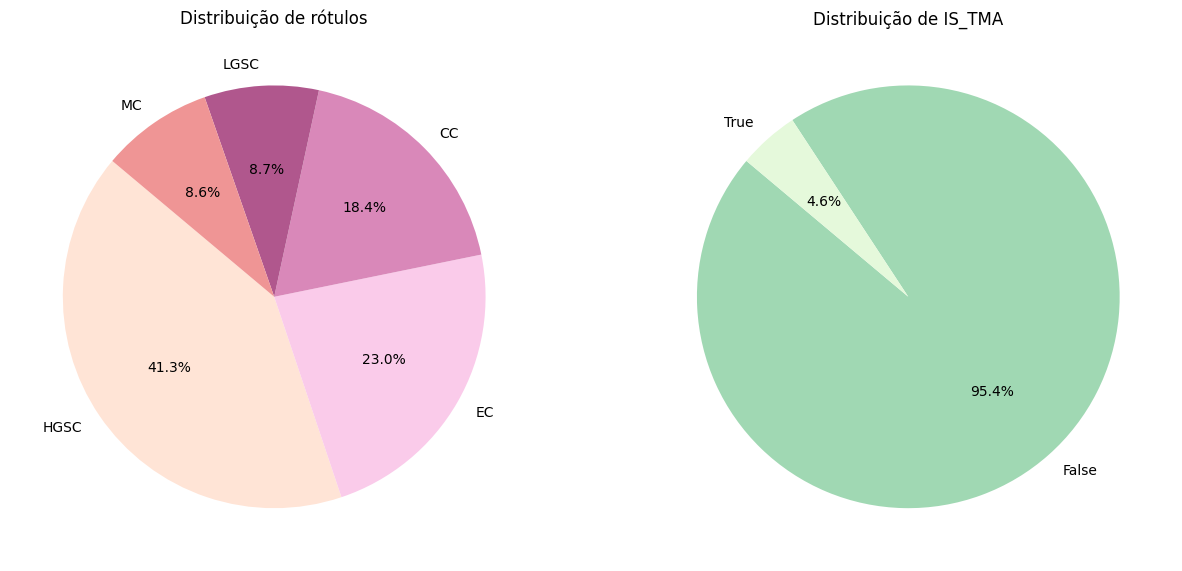

In [11]:
colors = ['#FFE4D6', '#FACBEA', '#D988B9', '#B0578D', '#EF9595']

# Extração de distribuição do rótulo
labels = train_data['label'].value_counts().index
sizes = train_data['label'].value_counts().values

# Extraindo a distribuição IS_TMA
is_tma_counts = train_data['is_tma'].value_counts()

# Plotando gráficos de pizza lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Plotando o gráfico de pizza para distribuição de etiquetas
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Distribuição de rótulos')

# Plotando o gráfico de pizza para distribuição IS_TMA
ax2.pie(is_tma_counts, labels=is_tma_counts.index, autopct='%1.1f%%', startangle=140, colors=['#A0D8B3', '#E5F9DB'])
ax2.set_title('Distribuição de IS_TMA')

plt.show()

### <strong>Análise Estatística por Grupo: Resumo Estilizado de Dados de Treinamento por Rótulo</strong>

No código a seguir, está sendo realizado um processo de resumo estatístico para cada rótulo presente nos dados de treinamento. Inicialmente, é definida uma lista chamada **`columns_to_exclude`**, que contém as colunas a serem excluídas do resumo. Em seguida, é criado um dicionário vazio chamado **`styled_summaries`** para armazenar os resumos estilizados. Utilizando um loop sobre os rótulos únicos presentes na coluna 'label' dos dados de treinamento, o código filtra os dados correspondentes a cada rótulo e exclui as colunas especificadas em **`columns_to_exclude`**. Em seguida, é gerado um resumo estatístico para as colunas restantes, incluindo apenas os tipos de dados numéricos (float64, int64, float, int), arredondando os valores para duas casas decimais. O resumo é então estilizado com um gradiente de cores utilizando a função **`background_gradient`**, e um título é adicionado utilizando a função **`set_caption`**. O resumo estilizado é armazenado no dicionário **`styled_summaries`** com a chave sendo o rótulo correspondente. Por fim, um loop é utilizado para exibir os resumos estilizados para cada rótulo utilizando a função **`display`**. Este código é útil para analisar estatísticas descritivas de diferentes grupos de dados e facilita a visualização das informações estatísticas relevantes de maneira organizada e esteticamente agradável.

In [12]:
# Colunas a serem excluídas do resumo estatístico
colunas_a_excluir = ['image_id']

# Dicionário para armazenar os resumos estilizados por rótulo
resumos_estilizados = {}

# Loop pelos rótulos únicos dos dados de treinamento
for rotulo in train_data['label'].unique():
    # Filtrar os dados pelo rótulo e excluir colunas específicas
    dados_filtrados = train_data[train_data['label'] == rotulo].drop(columns=colunas_a_excluir)
    
    # Calcular o resumo estatístico e estilizar
    resumo_estatistico = dados_filtrados.describe(include=['float64', 'int64', 'float', 'int']).round(2)
    resumo_estilizado = resumo_estatistico.T.style.background_gradient(cmap='magma', low=0.2, high=0.1).set_caption(f'<h2 style="text-align:center;font-size:15px">Resumo da Tabela de {rotulo}')
    
    # Armazenar o resumo estilizado no dicionário
    resumos_estilizados[rotulo] = resumo_estilizado

# Exibir os resumos estilizados
for rotulo, resumo_estilizado in resumos_estilizados.items():
    display(resumo_estilizado)


### <strong>Criando Boxplots para Largura e Altura de Imagem com `Seaborn`</strong>

No código a seguir, está sendo definida uma função **configurar_estilo** que utiliza a biblioteca **sns** para configurar o estilo do gráfico como "whitegrid". Em seguida, há a função **criar_graficos_boxplot** que recebe um conjunto de dados de treinamento e cria dois gráficos de boxplot lado a lado, utilizando a biblioteca **plt** para plotagem e definindo o tamanho da figura como 15 por 6. Esses gráficos são gerados pela função **criar_boxplot**, que recebe como parâmetros os dados, o eixo x, o título, uma paleta de cores e o eixo onde o gráfico será desenhado. Por fim, a função **exibir_grafico** é chamada para mostrar os gráficos criados.

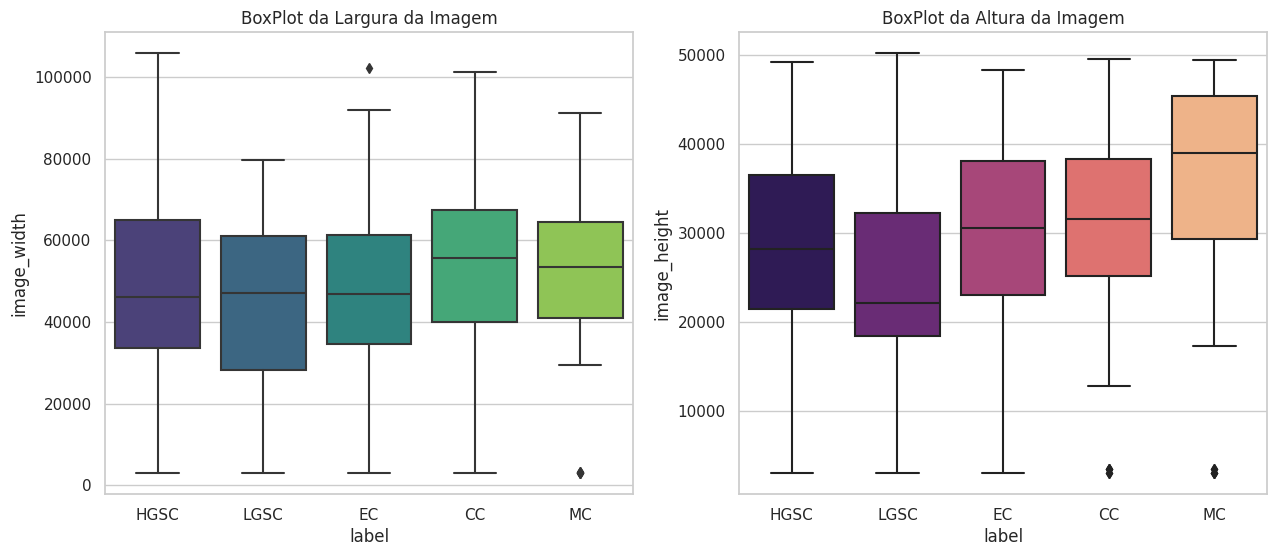

In [14]:
def configurar_estilo():
    sns.set(style="whitegrid")

def criar_graficos_boxplot(train_data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    criar_boxplot(train_data, 'image_width', 'BoxPlot da Largura da Imagem', 'viridis', axes[0])
    criar_boxplot(train_data, 'image_height', 'BoxPlot da Altura da Imagem', 'magma', axes[1])
    exibir_grafico()

def criar_boxplot(data, eixo_x, titulo, paleta, axe):
    sns.boxplot(x='label', y=eixo_x, data=data, palette=paleta, ax=axe)
    axe.set_title(titulo)

def exibir_grafico():
    plt.show()

# Chamada das funções
configurar_estilo()
criar_graficos_boxplot(train_data)

### <strong>Plotando a Distribuição de Imagens e Miniaturas nos Conjuntos de Treinamento e Teste</strong>

No código a seguir, está sendo definida uma função **contar_arquivos** que recebe um argumento *diretorio* e retorna o número de arquivos presentes nesse diretório utilizando a biblioteca **os**. Em seguida, há a função **criar_grafico_distribuicao**, que recebe como parâmetros um eixo (*ax*), um tipo de dados (*tipo_dados*), e as contagens de imagens e miniaturas. Essa função gera um gráfico de barras representando a distribuição entre imagens e miniaturas, utilizando a biblioteca **matplotlib**. Por fim, a função **plotar_distribuicao** utiliza as funções anteriores para contar o número de arquivos em diretórios de imagens e miniaturas, e plotar dois gráficos lado a lado para conjuntos de dados de treino e teste. O gráfico apresenta as distribuições de imagens e miniaturas para cada conjunto de dados, com os eixos devidamente rotulados e título explicativo.

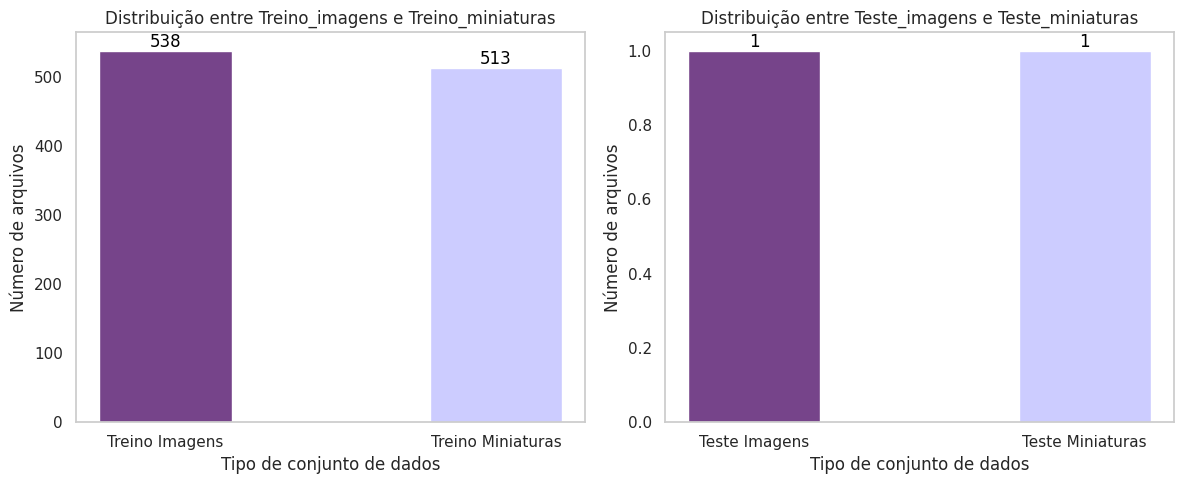

In [16]:
def contar_arquivos(diretorio):
    return len(os.listdir(diretorio))

def criar_grafico_distribuicao(ax, tipo_dados, contagem_imagens, contagem_thumbnails):
    labels = ['Imagens', 'Miniaturas']
    contagens = [contagem_imagens, contagem_thumbnails]
    cores = ['#76448A', '#CCCCFF']

    barras = ax.bar([f'{tipo_dados} {label}' for label in labels], contagens, color=cores, width=0.4)

    for barra, contagem in zip(barras, contagens):
        yval = barra.get_height()
        texto_ypos = max(yval, 0.5)
        ax.text(barra.get_x() + barra.get_width()/2, texto_ypos, round(contagem, 2), ha='center', va='bottom', color='black')

    ax.grid(False)
    ax.set_title(f'Distribuição entre {tipo_dados}_imagens e {tipo_dados}_miniaturas')
    ax.set_xlabel('Tipo de conjunto de dados')
    ax.set_ylabel('Número de arquivos')

def plotar_distribuicao(image_dir, thumbnail_dir, data_type, ax):
    contagem_imagens = contar_arquivos(image_dir)
    contagem_thumbnails = contar_arquivos(thumbnail_dir)
    criar_grafico_distribuicao(ax, data_type, contagem_imagens, contagem_thumbnails)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plotar_distribuicao(train_image_dir, train_thumbnails_folder_path, 'Treino', axes[0])
plotar_distribuicao(test_image_dir, test_thumbnails_folder_path, 'Teste', axes[1])

plt.tight_layout()
plt.show()

### <strong>Plotar Imagens Aleatórias do Conjunto de Treinamento com `Matplotlib` e `PIL`</strong>

No código a seguir, está sendo definida a estratégia para exibir uma amostra de imagens de cada rótulo presente no conjunto de dados de treinamento. Primeiro, são identificados os **coluna_rotulo**, **coluna_caminho** e **coluna_id_imagem** que representam, respectivamente, o rótulo das imagens, o caminho para as imagens e o identificador único de cada imagem. Em seguida, são obtidos os rótulos únicos presentes nos dados de treinamento. Para cada rótulo único, é feita uma seleção dos dados correspondentes. Uma amostra das imagens é então extraída, com um limite máximo definido por **imagens_por_rotulo** ou o número total de imagens disponíveis para o rótulo, caso seja menor. As imagens são então exibidas em uma figura, onde cada subplot representa uma imagem. O título de cada subplot indica o ID da imagem correspondente.

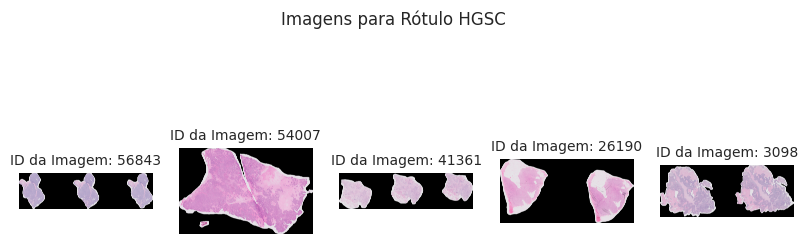

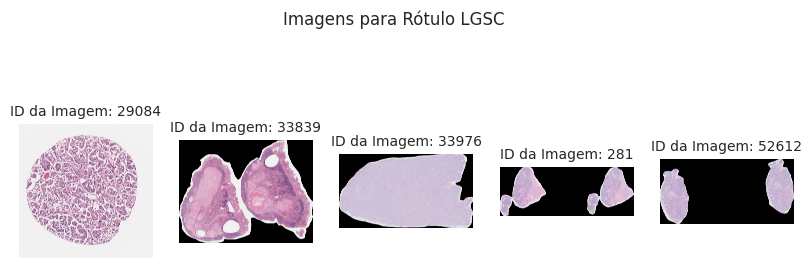

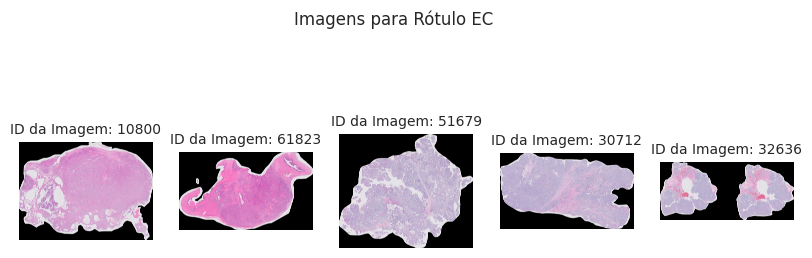

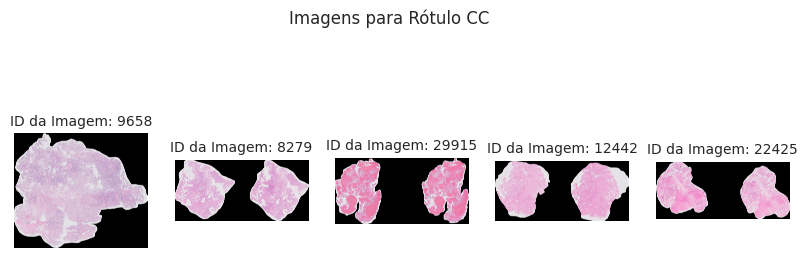

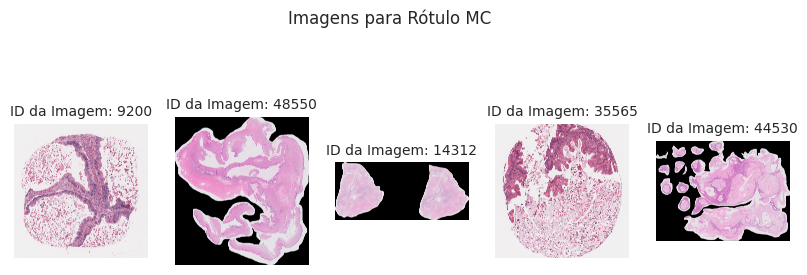

In [17]:
# Definição das colunas
coluna_rotulo = 'label'
coluna_caminho = 'full_path'
coluna_id_imagem = 'image_id'

# Obtendo os rótulos únicos
rotulos_unicos = train_data[coluna_rotulo].unique()

# Definindo o número máximo de imagens por rótulo a serem exibidas
imagens_por_rotulo = 5

# Iterando sobre os rótulos únicos
for rotulo in rotulos_unicos:
    # Selecionando os dados do rótulo atual
    dados_rotulo = train_data[train_data[coluna_rotulo] == rotulo]
    
    # Amostrando as imagens do rótulo atual
    imagens_amostradas = dados_rotulo.sample(min(imagens_por_rotulo, len(dados_rotulo)))
    
    # Criando a figura para exibição das imagens
    plt.figure(figsize=(10, 3))
    plt.suptitle(f'Imagens para Rótulo {rotulo}', y=1.1, fontsize=12)

    # Iterando sobre as imagens amostradas
    for i, (_, linha) in enumerate(imagens_amostradas.iterrows()):
        caminho_imagem = linha[coluna_caminho]
        imagem = Image.open(caminho_imagem)

        # Adicionando a imagem ao subplot
        plt.subplot(1, imagens_por_rotulo, i + 1)
        plt.imshow(imagem)
        plt.title(f'ID da Imagem: {linha[coluna_id_imagem]}', fontsize=10)
        plt.axis('off')

    plt.show()

### <strong>Carregando e Definindo o Caminho da Pasta com as Miniaturas de Teste usando `Pandas`</strong>

No código a seguir, está sendo carregado um conjunto de dados de teste a partir de um arquivo CSV usando a **função** `pd.read_csv()` da biblioteca **pandas**. Em seguida, é definido o caminho da pasta contendo miniaturas de teste. Utilizando a **função** `apply()` do dataframe de teste, é criado o caminho completo para cada miniatura de imagem, combinando o caminho da pasta de miniaturas com o nome de cada imagem, utilizando a **função** `os.path.join()` da biblioteca **os**. Por fim, as primeiras linhas do dataframe de teste são exibidas com a **função** `head()` para verificar a correta criação dos caminhos completos para as miniaturas de imagem.

In [23]:
# Carregar dados de teste
caminho_teste = '../input/UBC-OCEAN/test.csv'
dados_teste = pd.read_csv(caminho_teste)

# Definir caminho da pasta de miniaturas de teste
caminho_miniaturas_teste = '../input/UBC-OCEAN/test_thumbnails'

# Criar o caminho completo para cada miniatura de imagem no dataframe de teste
dados_teste['caminho_completo'] = dados_teste['image_id'].apply(lambda x: os.path.join(caminho_miniaturas_teste, f"{x}_thumbnail.png"))

# Exibir as primeiras linhas do dataframe de teste
display(dados_teste.head())

image_id  image_width  image_height  \
0        41        28469         16987   

                                    caminho_completo  
0  ../input/UBC-OCEAN/test_thumbnails/41_thumbnai...

### <strong>Plotando as Imagens de Teste com `Matplotlib` e `PIL`</strong>

No código a seguir, está sendo definida a função **plotar_imagens_dados_teste** que recebe como parâmetros um DataFrame **dados_teste** e os nomes das colunas que contêm o ID da imagem (**coluna_id_imagem**), a largura (**coluna_largura**), a altura (**coluna_altura**) e o caminho da imagem (**coluna_caminho**), além do número de imagens a serem plotadas (**num_imagens**). Dentro da função, é configurado o tamanho da figura e é criado um laço para percorrer as linhas do DataFrame, abrir cada imagem usando a biblioteca **Image** e plotá-las utilizando a biblioteca **plt** do matplotlib. Cada imagem é adicionada a um subplot com o título contendo o ID da imagem correspondente, e em seguida, é desativado o eixo para melhor visualização. Por fim, é ajustado o layout e exibida a figura. O exemplo de uso mostra como chamar a função, passando um DataFrame de dados de teste e os nomes das colunas relevantes.

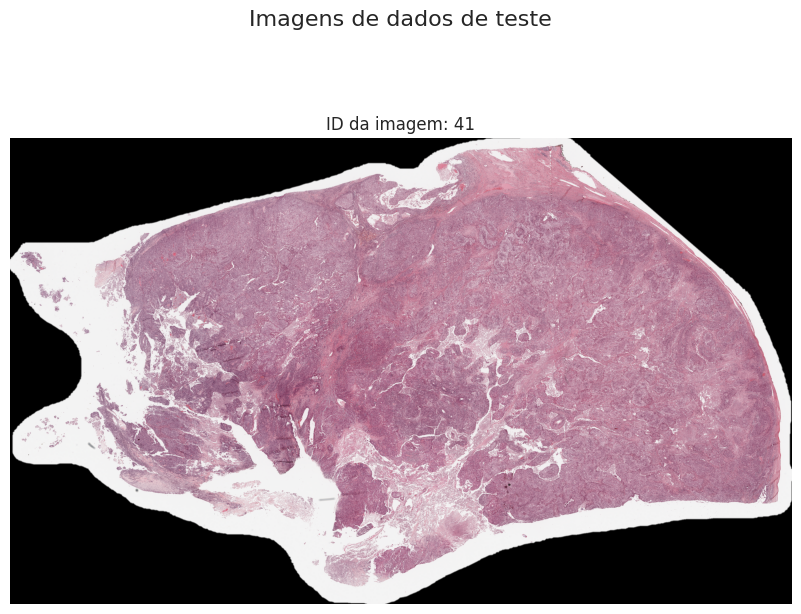

In [27]:
def plotar_imagens_dados_teste(dados_teste, coluna_id_imagem, coluna_largura, coluna_altura, coluna_caminho, num_imagens):
  
    largura_figura = 10
    altura_figura = 5 * num_imagens
    plt.figure(figsize=(largura_figura, altura_figura))
    plt.suptitle('Imagens de dados de teste', y=1.02, fontsize=16)

    for i, (_, linha) in enumerate(dados_teste.iterrows()):
        caminho_imagem = linha[coluna_caminho]
        imagem = Image.open(caminho_imagem)

        plt.subplot(num_imagens, 1, i + 1)
        plt.imshow(imagem)
        plt.title(f'ID da imagem: {linha[coluna_id_imagem]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Exemplo de uso:
plotar_imagens_dados_teste(test_data, 'image_id', 'image_width', 'image_height', 'full_path', 5)

# <font color=red><strong>Pré-processamento dos Dados</strong></font>

### <strong>Convertendo Rótulos de Texto em Rótulos Numéricos</strong>

No código a seguir, está sendo realizado um mapeamento dos rótulos de texto para rótulos numéricos utilizando a função **`map`** do pandas. Primeiro, é definido um dicionário de mapeamento onde cada rótulo de texto é associado a um valor numérico. Em seguida, a coluna 'label' do DataFrame de treinamento (**train_data**) é mapeada de acordo com esse dicionário, e os resultados são armazenados em uma nova coluna chamada **numerical_label**. Este processo é útil para converter dados categóricos em uma forma numérica que pode ser utilizada em algoritmos de aprendizado de máquina.

In [29]:
label_mapping = {'CC': 0, 'EC': 1, 'HGSC': 2, 'LGSC': 3, 'MC': 4}
train_data['numerical_label'] = train_data['label'].map(label_mapping)

### <strong>Contando as Ocorrências por Categoria na Coluna 'label' usando `Pandas`</strong>

No código a seguir, está sendo realizada a contagem de ocorrências de cada categoria na coluna 'label' do conjunto de dados de treinamento. Isso é feito utilizando a função **value_counts()** da biblioteca pandas, que retorna uma série com as contagens de cada valor único na coluna especificada. O resultado é armazenado na variável **label_counts** e exibido, mostrando quantas instâncias correspondem a cada categoria na coluna 'label'.

In [33]:
label_counts = train_data['label'].value_counts()
label_counts.to_frame()

count
label       
HGSC     222
EC       124
CC        99
LGSC      47
MC        46

### <strong>Realizando Reamostragem para Equilíbrio de Classes utilizando `sklearn`</strong>

Como indicado acima, as classes são muito desequilibradas. Portanto, aumentamos o número de imagens para cada classe de amostragem (o aumento do número pode variar de acordo com os modelos). Com isso, está sendo utilizada a biblioteca **sklearn** para realizar o reamostragem (ou ressampleamento) de dados. A função **`resample`** é empregada para garantir que cada classe tenha um número alvo de amostras, definido como 222 neste caso, sendo armazenado na variável **target_samples**. O código itera sobre cada classe única nos dados de treinamento e, para cada classe, seleciona os dados correspondentes. Em seguida, utiliza a função **`resample`** para criar uma nova amostra da classe com reposição, garantindo que tenha o número desejado de amostras. Os dados reamostrados são armazenados em uma lista. Por fim, a função **`pd.concat`** é usada para concatenar os dados reamostrados e criar um conjunto de dados de treinamento equilibrado, onde todas as classes têm o mesmo número de amostras, conforme especificado pelo número alvo.

In [44]:
from sklearn.utils import resample

target_samples = 222
resampled_data = []

for label in train_data['numerical_label'].unique():
    class_data = train_data[train_data['numerical_label'] == label]
    resampled_class = resample(class_data, replace=True, n_samples=target_samples, random_state=42)
    resampled_data.append(resampled_class)

balanced_train_data = pd.concat(resampled_data)

# <font color=red><strong>Transformação de dados</strong></font>

### <strong>Redimensionando as Imagens para (512 X 512) Pixels utilizando `NumPy` e `PIL`</strong>

No código a seguir, está sendo definida a função **carregar_e_preprocessar_dados** que recebe como entrada os dados de treino balanceados e o tamanho das imagens. Dentro da função, é calculada a quantidade de dados no conjunto de treino balanceado. Em seguida, são inicializadas duas matrizes vazias, **x_balanceado** e **y_balanceado**, para armazenar as imagens e suas respectivas etiquetas numéricas. Um loop é iterado sobre os caminhos das imagens no conjunto de dados, onde cada imagem é aberta, redimensionada para o tamanho especificado e convertida para o formato RGB. Os arrays correspondentes são então atualizados com os valores da imagem e suas etiquetas. Por fim, a função retorna os conjuntos de dados pré-processados **x_balanceado** e **y_balanceado**. Ao chamar a função com os dados de treino balanceados e o tamanho das imagens (512x512), os resultados são impressos, exibindo as formas (shapes) dos conjuntos de dados **x_balanceado** e **y_balanceado**.

In [46]:
def carregar_e_preprocessar_dados(dados_treino_balanceados, tamanho_imagem):
    quantidade_dados = len(dados_treino_balanceados)
    x_balanceado = np.empty(shape=(quantidade_dados, *tamanho_imagem, 3), dtype=np.uint8)
    y_balanceado = np.empty(shape=quantidade_dados, dtype=np.uint8)

    for indice, caminho_completo in enumerate(dados_treino_balanceados['full_path']):
        imagem_array = Image.open(caminho_completo).resize(tamanho_imagem).convert('RGB')
        x_balanceado[indice] = np.array(imagem_array)
        y_balanceado[indice] = dados_treino_balanceados.iloc[indice]['numerical_label']

    return x_balanceado, y_balanceado

x_balanceado, y_balanceado = carregar_e_preprocessar_dados(dados_treino_balanceados, (512, 512))

print(x_balanceado.shape)
print(y_balanceado.shape)

(1110, 512, 512, 3)
(1110,)


### <strong>Utilizando `OneHotEncoder` do scikit-learn para Lidar com Variáveis Categóricas</strong>

No código a seguir, está sendo utilizado o módulo **sklearn.preprocessing** para importar a classe **OneHotEncoder**, que é uma técnica de pré-processamento para converter variáveis categóricas em uma representação numérica. A função **codificar_labels** recebe como entrada um array **y** e realiza a codificação das suas labels utilizando o **OneHotEncoder**. Primeiro, o array **y** é remodelado para ter uma dimensão apropriada. Em seguida, é criado um objeto **codificador** da classe **OneHotEncoder** e é ajustado ao array **y_codificado** usando o método **fit()**. Posteriormente, as labels são codificadas utilizando o método **transform()**, e o resultado é convertido em uma matriz numérica usando **toarray()**. Por fim, o array **y_balanceado** é atualizado com as labels codificadas, e é impressa a sua forma (shape).

In [47]:
from sklearn.preprocessing import OneHotEncoder

def codificar_labels(y):
    y_codificado = y.reshape(len(y), -1)
    codificador = OneHotEncoder()
    codificador.fit(y_codificado)
    y_codificado = codificador.transform(y_codificado).toarray()
    return y_codificado

y_balanceado = codificar_labels(y_balanceado)
print(y_balanceado.shape)

(1110, 5)


No código a seguir, está sendo utilizado o comando print para exibir os cinco primeiros elementos da **variável** y_balanced. Essa **variável**  contém dados balanceados, indicando que foi aplicado um tipo de técnica de balanceamento de classes em um conjunto de dados, como o `oversampling` ou undersampling. O uso do índice [:5] especifica que apenas os primeiros cinco elementos serão mostrados, o que é útil para verificar a distribuição dos dados após o balanceamento.

In [49]:
print(y_balanceado[:5])

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


### <strong>Realizando a Divisão dos Dados para Treinamento e Validação Usando `train_test_split`</strong>

No código a seguir, está sendo realizada a divisão dos dados em conjuntos de treinamento e validação utilizando a **biblioteca sklearn**. A função **train_test_split** é empregada para isso, onde os dados balanceados **x_balanceado** e **y_balanceado** são divididos em conjuntos de treinamento e validação, com uma proporção de 80% para treinamento e 20% para validação. O parâmetro **random_state** é definido como 1 para garantir reprodutibilidade na divisão dos dados, e o parâmetro **stratify** é utilizado para preservar a proporção das classes alvo **y_balanceado** nos conjuntos de treinamento e validação. Após a divisão, são exibidas as dimensões dos conjuntos de treinamento e validação, indicando o número de amostras e características em cada conjunto, utilizando a função **print**.

In [51]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em conjuntos de treinamento e validação
x_treino, x_validacao, y_treino, y_validacao = train_test_split(
    x_balanceado, y_balanceado, 
    test_size=0.2, 
    random_state=1, 
    stratify=y_balanceado
)

# Exibir as dimensões dos conjuntos de dados
print("Dimensões do conjunto de treinamento:", x_treino.shape, y_treino.shape)
print("Dimensões do conjunto de validação:", x_validacao.shape, y_validacao.shape)


Dimensões do conjunto de treinamento: (888, 512, 512, 3) (888, 5)
Dimensões do conjunto de validação: (222, 512, 512, 3) (222, 5)


### <strong>Realizando o Pré-processamento e Manipulando as Imagens com `TensorFlow`</strong>

No código a seguir, está sendo definida a função **mostrar_imagem**, a qual recebe um parâmetro **imagem**. Dentro dessa função, é criada uma nova figura utilizando a biblioteca **matplotlib.pyplot** com **plt.figure()**. Em seguida, a imagem é exibida utilizando **plt.imshow(imagem)**, com a adição de uma barra de cores através de **plt.colorbar()**. Para melhor visualização, a grade é desativada com **plt.grid(False)**. Por fim, a imagem é mostrada na tela com **plt.show()**. A função é então chamada passando como argumento a primeira imagem do conjunto de treinamento **x_treino[0]**.

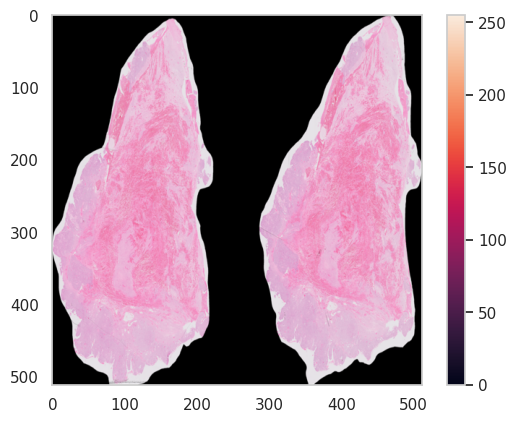

In [54]:
def mostrar_imagem(imagem):
    plt.figure()
    plt.imshow(imagem)
    plt.colorbar()
    plt.grid(False)
    plt.show()

mostrar_imagem(x_treino[0])

### <strong>Realizando o Aumento de Dados em Imagens Utilizando a Classe `ImageDataGenerator`</strong>

No código a seguir, está sendo utilizado o **ImageDataGenerator** da biblioteca **keras.preprocessing.image** para realizar aumento de dados em imagens. Esse processo envolve a aplicação de diversas transformações, como rotação, deslocamento horizontal e vertical, inclinação, zoom e espelhamento, com o objetivo de aumentar a diversidade do conjunto de dados de treinamento. Os parâmetros especificados, como **rotation_range**, **width_shift_range**, **height_shift_range**, **shear_range**, **zoom_range**, **horizontal_flip** e **vertical_flip**, controlam a intensidade e o tipo de transformações aplicadas. A opção **fill_mode='nearest'** determina como os pixels são preenchidos após as transformações. Por fim, o método **fit(x_train)** é utilizado para ajustar o gerador aos dados de treinamento, permitindo que as transformações sejam aplicadas durante o treinamento do modelo de rede neural convolucional.

In [56]:
from keras.preprocessing.image import ImageDataGenerator

# Criando um objeto ImageDataGenerator com os parâmetros especificados
gerador_imagens = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

# Adequando o gerador de imagens aos dados de treinamento
gerador_imagens.fit(x_treino)

### <strong>Efetuando a Geração de Imagens Aumentadas do Conjunto de Treinamento com `NumPy` e `Pyplot`</strong>

No código a seguir, está sendo realizada a geração de imagens aumentadas a partir de uma amostra de imagem selecionada do conjunto de treinamento (**x_treino**). Primeiro, a amostra de imagem é expandida para uma dimensão adicional usando a função **np.expand_dims**. Em seguida, utilizando o gerador de imagens (**gerador_imagens**), são geradas imagens aumentadas com base na amostra, com um tamanho de lote de 5. As imagens original e as aumentadas são plotadas em uma figura usando **matplotlib.pyplot**, onde a imagem original é mostrada na primeira subparcela e as imagens aumentadas são mostradas nas subparcelas subsequentes. O loop for percorre as imagens aumentadas, plotando cada uma delas. O loop é interrompido após a plotagem de 4 imagens aumentadas, conforme indicado pela condição if i == 3. Ao final, a figura contendo a imagem original e as imagens aumentadas é exibida.

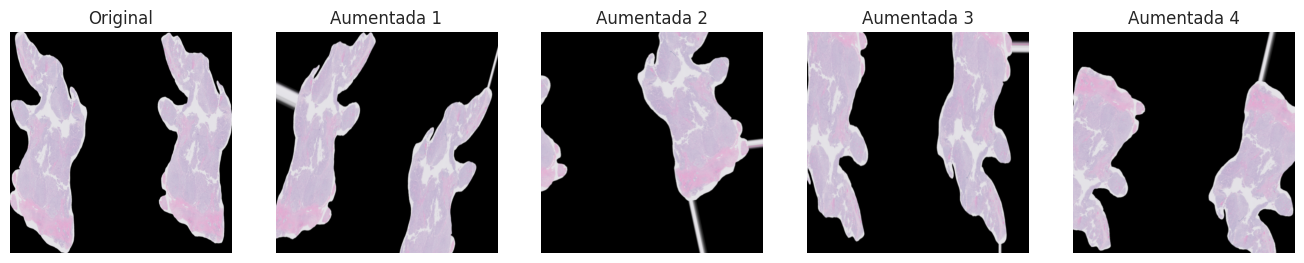

In [59]:
# Escolha uma imagem de amostra de x_train
amostra_imagem = x_treino[2]
amostra_imagem = np.expand_dims(amostra_imagem, axis=0)

# Gerar imagens aumentadas
imagens_aumentadas = gerador_imagens.flow(amostra_imagem, batch_size=5)

plt.figure(figsize=(20, 20))

# Plote a imagem original
plt.subplot(1, 6, 1)
plt.imshow(amostra_imagem[0].astype('uint8'))
plt.axis('off')
plt.title('Original')

# Plote as imagens aumentadas
for i, imagem_aumentada in enumerate(imagens_aumentadas):
    plt.subplot(1, 6, i + 2)
    plt.imshow(imagem_aumentada[0].astype('uint8'))
    plt.axis('off')
    plt.title(f'Aumentada {i + 1}')

    if i == 3:
        break  # Exiba apenas 4 imagens aumentadas

plt.show()

# <font color=red><strong>Engenharia de Recursos</strong></font>

### <strong>Realizando o Processo de Extração de Características em Imagens</strong>

No código a seguir, está sendo realizado um processo de extração de características a partir de uma amostra de imagens de cada rótulo. Inicialmente, a função **`groupby`** é utilizada para agrupar os dados de treinamento pelo atributo 'label', e em seguida, a função **`apply`** é aplicada a cada grupo para selecionar uma imagem de amostra. Isso é feito por meio de uma função **`lambda`** que seleciona aleatoriamente uma única imagem de cada grupo. Posteriormente, o DataFrame resultante é redefinido para ter um índice simples, e apenas as colunas 'image_id', 'label' e 'full_path' são mantidas. Essa estrutura de dados resultante representa uma amostra de imagens representativas de cada classe presente nos dados de treinamento.

In [65]:
# Extrai uma amostra aleatória de cada classe do conjunto de treinamento
amostra_por_classe = train_data.groupby('label').apply(lambda classe: classe.sample(1))

# Redefine o índice para evitar repetições
amostra_por_classe.reset_index(drop=True, inplace=True)

# Seleciona apenas as colunas necessárias
amostra_por_classe = amostra_por_classe[['image_id', 'label', 'full_path']]

# Exibe as primeiras linhas do DataFrame resultante
display(amostra_por_classe.head())

image_id label                                          full_path
0     42125    CC  ../input/UBC-OCEAN/train_thumbnails/42125_thum...
1     38479    EC  ../input/UBC-OCEAN/train_thumbnails/38479_thum...
2     64950  HGSC  ../input/UBC-OCEAN/train_thumbnails/64950_thum...
3     29084  LGSC          ../input/UBC-OCEAN/train_images/29084.png
4     39208    MC  ../input/UBC-OCEAN/train_thumbnails/39208_thum...

### <strong>Realizando a Visualização de Histograma de Cores para Imagens</strong>

No código a seguir, está sendo importada a biblioteca **math** para realizar cálculos matemáticos. Em seguida, a função **`criar_histograma_de_cores`** é definida, a qual recebe três parâmetros: o caminho da imagem, o ID da imagem e o rótulo. Dentro dessa função, a imagem é aberta usando a biblioteca **Image**, convertida para um array NumPy utilizando a variável **np_image** e então achatada para uma matriz unidimensional com três colunas representando os valores dos canais de cores RGB. O histograma de cores é plotado usando a biblioteca **SeaBorn** através da função **sns.`histplot`**, com os valores dos pixels distribuídos em 256 bins e sem a adição de uma estimativa de densidade. O título do gráfico é configurado com o ID da imagem e o rótulo, enquanto os rótulos dos eixos x e y indicam o valor do pixel e sua frequência, respectivamente. Fora da função, é calculado o número de imagens a serem plotadas e o número de linhas necessárias para organizá-las em uma matriz com até três colunas, considerando que cada linha representa uma imagem. Em seguida, é criado um gráfico de tamanho adequado para a quantidade de imagens a serem plotadas, e para cada linha do dataframe **amostra_por_classe**, é iterado sobre as linhas e, para cada uma, é chamada a função **`criar_histograma_de_cores`** para plotar o histograma de cores da respectiva imagem. Por fim, os gráficos são organizados em um layout ajustado e exibidos.

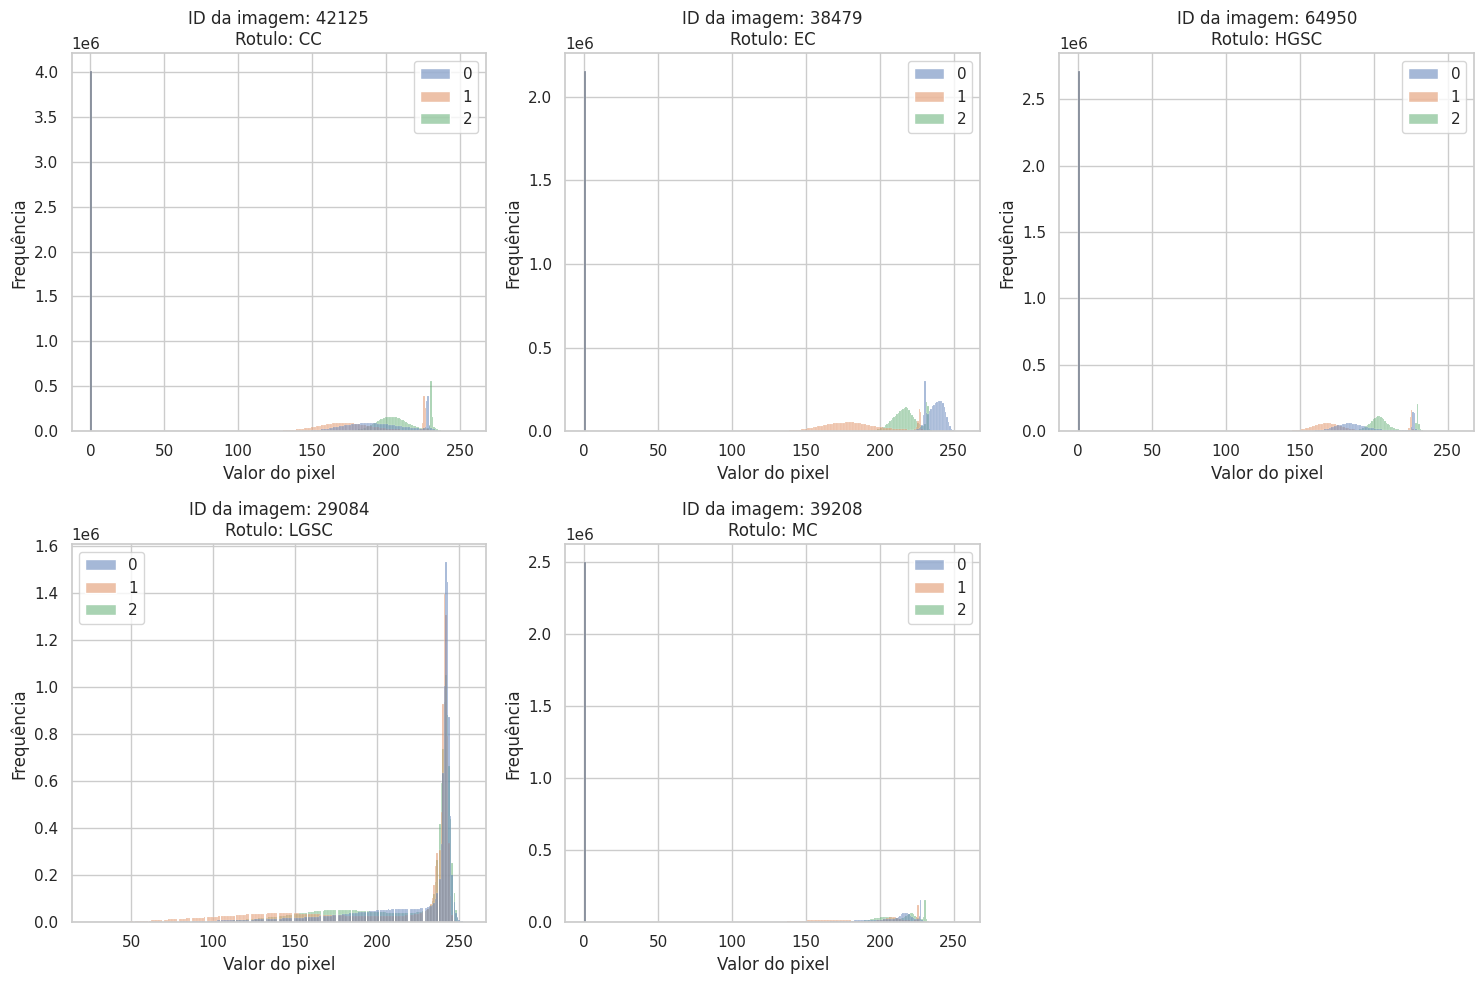

In [68]:
import math


def criar_histograma_de_cores(caminho_imagem, id_imagem, rotulo):
    imagem = Image.open(caminho_imagem)
    array_np_imagem = np.array(imagem)
    array_aplanado = array_np_imagem.reshape((-1, 3))

    sns.histplot(array_aplanado, bins=256, kde=False)
    plt.title(f'ID da imagem: {id_imagem}\nRotulo: {rotulo}')
    plt.xlabel('Valor do pixel')
    plt.ylabel('Frequência')

num_imagens = len(amostra_por_classe)
num_linhas = math.ceil(num_imagens / 3)

plt.figure(figsize=(15, 5 * num_linhas))

for idx, linha in amostra_por_classe.iterrows():
    posicao_subplot = (num_linhas, 3, idx % (3 * num_linhas) + 1)

    plt.subplot(*posicao_subplot)
    criar_histograma_de_cores(linha['full_path'], linha['image_id'], linha['label'])

plt.tight_layout()
plt.show()

### <strong>Criando uma Função para Converter e Plotar Imagens em Escala de Cinza</strong>

No código a seguir, está sendo definida uma função chamada **`aplicar_escala_de_cinza_e_plotar`** que recebe como parâmetros o ID da imagem, sua etiqueta e o caminho da imagem. Dentro da função, a imagem é aberta usando a biblioteca **Image** e convertida para escala de cinza. Em seguida, é criado um array achatado da imagem em escala de cinza usando a biblioteca **numpy**. Esse array é então exibido no console, mostrando a matriz achatada correspondente ao ID da imagem e sua etiqueta. Depois, é gerado um gráfico com duas subtramas utilizando a biblioteca **matplotlib**: uma subtrama exibindo a imagem original e outra exibindo a imagem em escala de cinza. As informações do ID da imagem e sua etiqueta são incluídas nos títulos das subtramas. Após a exibição do gráfico, o array achatado é retornado. Por fim, uma lista vazia chamada **flattened_arrays** é definida, e um loop percorre as linhas de um DataFrame chamado **amostra_por_classe**. Para cada linha, a função **`aplicar_escala_de_cinza_e_plotar`** é chamada, passando o índice, a etiqueta e o caminho completo da imagem. O array resultante é adicionado à lista **flattened_arrays**.

Matriz achatada para ID da imagem 0 e etiqueta CC:
[0 0 0 ... 0 0 0]



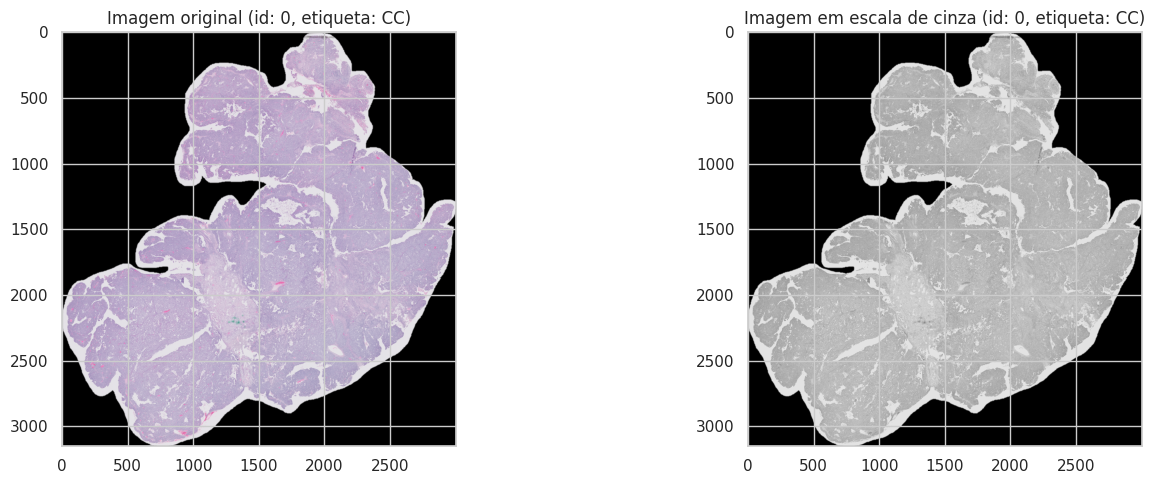

Matriz achatada para ID da imagem 1 e etiqueta EC:
[0 0 0 ... 0 0 0]



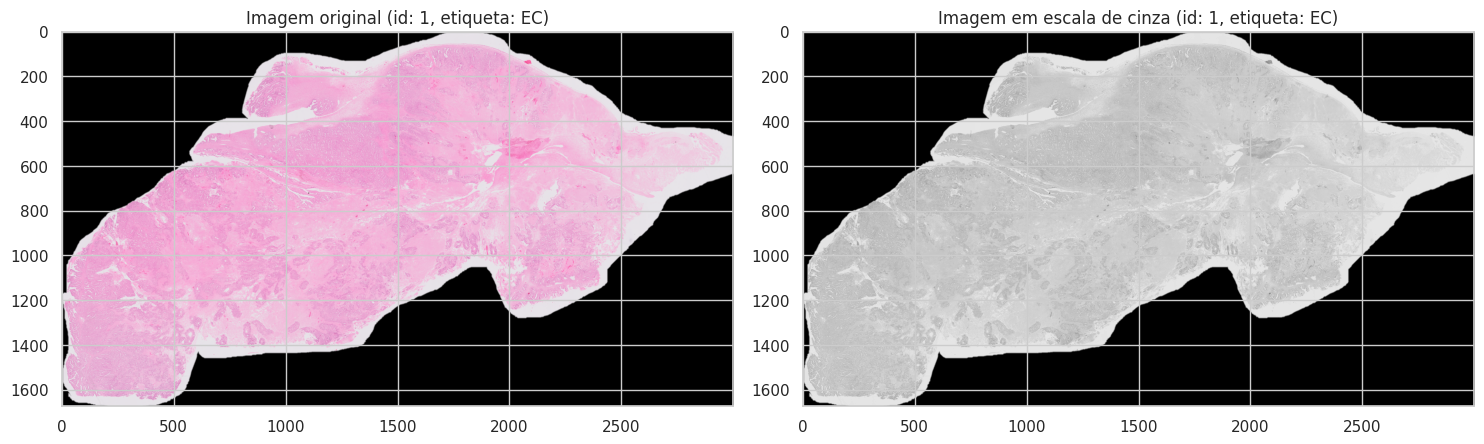

Matriz achatada para ID da imagem 2 e etiqueta HGSC:
[0 0 0 ... 0 0 0]



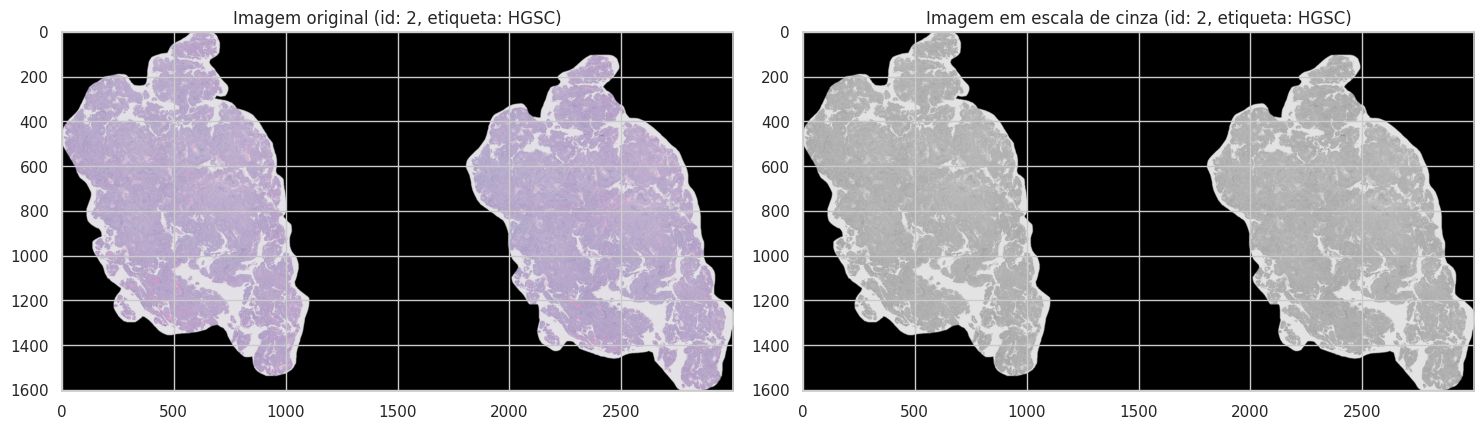

Matriz achatada para ID da imagem 3 e etiqueta LGSC:
[245 243 242 ... 244 241 244]



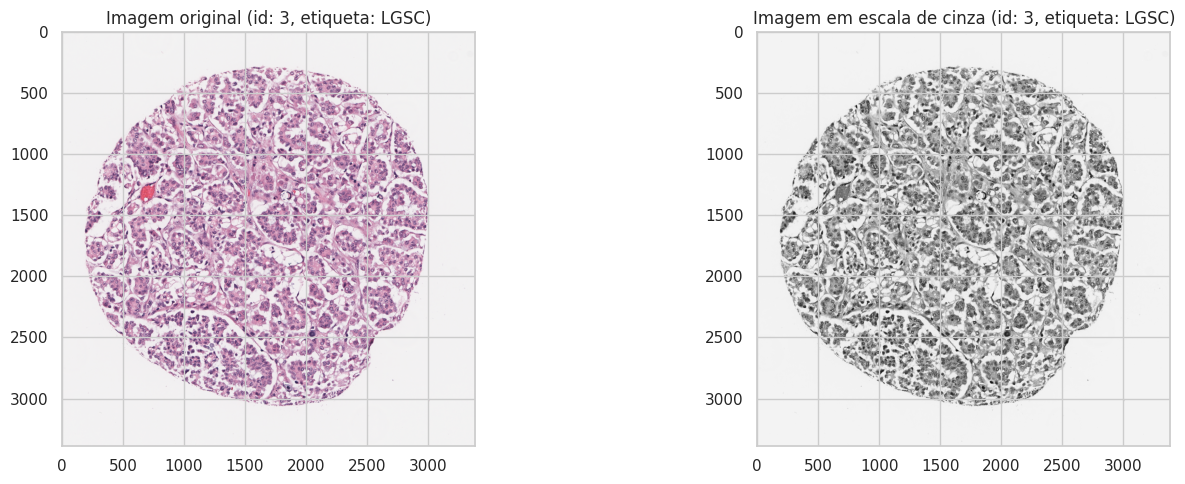

Matriz achatada para ID da imagem 4 e etiqueta MC:
[0 0 0 ... 0 0 0]



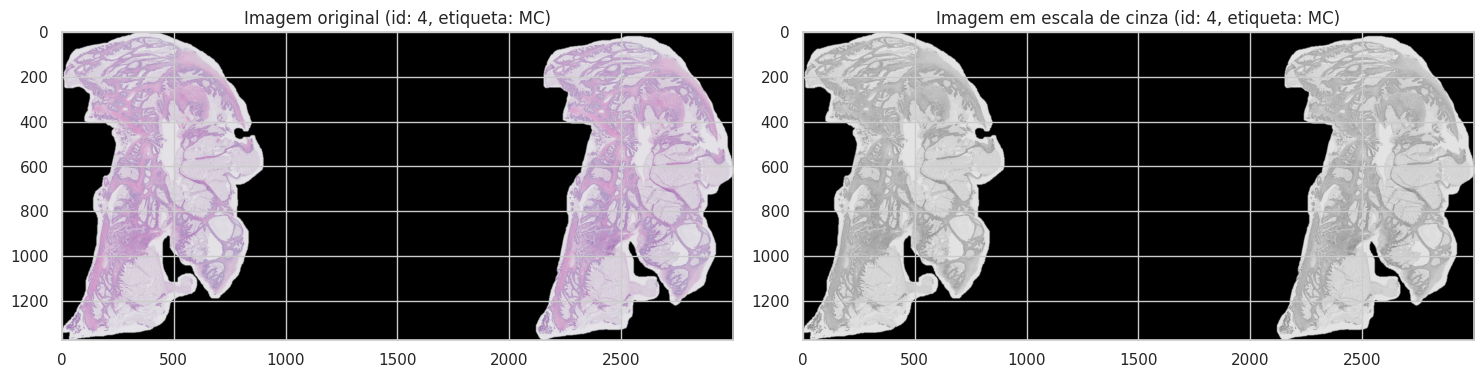

In [70]:
def aplicar_escala_de_cinza_e_plotar(id_imagem, etiqueta, caminho_imagem):
    imagem = Image.open(caminho_imagem)
    imagem_cinza = imagem.convert('L')

    matriz_aplana = np.array(imagem_cinza).flatten()
    print(f"Matriz achatada para ID da imagem {id_imagem} e etiqueta {etiqueta}:\n{matriz_aplana}\n")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(imagem)
    plt.title(f'Imagem original (id: {id_imagem}, etiqueta: {etiqueta})')

    plt.subplot(1, 2, 2)
    plt.imshow(imagem_cinza, cmap='gray')
    plt.title(f'Imagem em escala de cinza (id: {id_imagem}, etiqueta: {etiqueta})')

    plt.tight_layout()
    plt.show()

    return matriz_aplana

matrizes_aplana = []

for indice, linha in amostra_por_classe.iterrows():
    features_cinza = aplicar_escala_de_cinza_e_plotar(indice, linha['label'], linha['full_path'])
    matrizes_aplana.append(features_cinza)

### <strong>Criando uma Função Python para Aplicar Contorno e Histograma em Imagens</strong>

No código a seguir, está sendo definida a função **`aplicar_contorno_e_histograma`** que recebe como parâmetros o caminho da imagem, o ID da imagem e um rótulo. Dentro da função, a imagem é aberta utilizando a biblioteca **Image** e convertida para escala de cinza. Em seguida, a imagem é convertida para um array numpy. Uma nova figura é criada para o enredo de contorno utilizando a biblioteca **plt**. A imagem em escala de cinza é plotada como contorno utilizando a função **`contour`** da biblioteca **plt**. Algumas configurações adicionais são aplicadas, como a mudança para escala de cinza com **gray()**, definindo a origem da imagem como 'image', e removendo os eixos com **axis('off')**. Por fim, é adicionado um título à figura que inclui o ID da imagem e o rótulo. O código então itera sobre as linhas de um DataFrame, aplicando a função **`aplicar_contorno_e_histograma`** a cada linha, passando o caminho da imagem, o ID e o rótulo como argumentos.

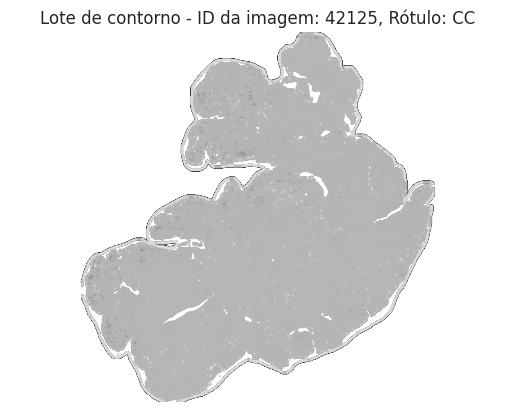

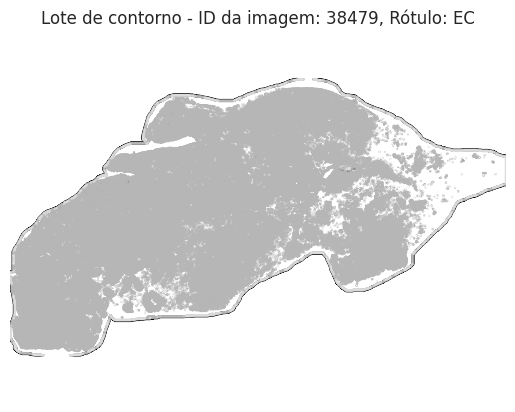

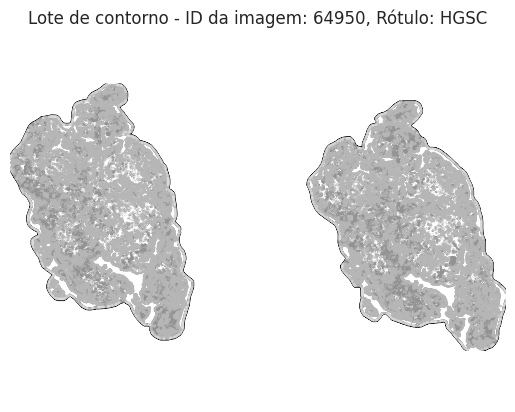

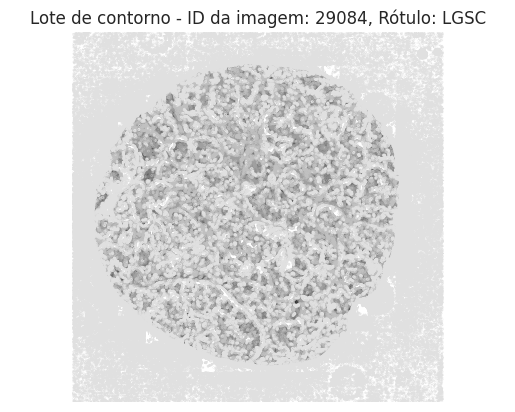

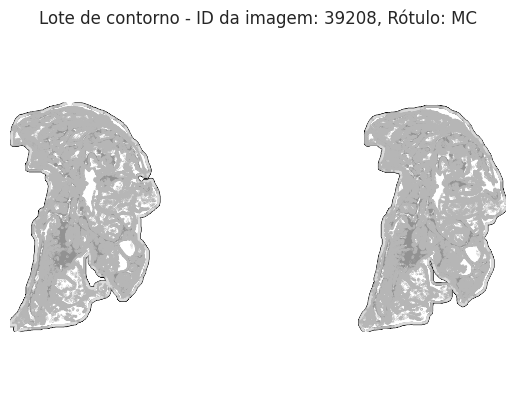

In [74]:
def aplicar_contorno_e_histograma(caminho_imagem, id_imagem, rotulo):
  
    imagem = Image.open(caminho_imagem)
    array_imagem = np.array(imagem.convert('L'))

    plt.figure()
    plt.gray()
    plt.contour(array_imagem, origin='image')
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'Lote de contorno - ID da imagem: {id_imagem}, Rótulo: {rotulo}')

for indice, linha in amostra_por_classe.iterrows():
    aplicar_contorno_e_histograma(linha['full_path'], linha['image_id'], linha['label'])

# <font color=red><strong>Modelo - RestNet50</strong></font>

### <strong>Explorando as Funcionalidades da Biblioteca `keras.applications`</strong>

No código a seguir, está sendo importada a biblioteca **keras.applications** e em seguida são listadas todas as funções e variáveis disponíveis nesse módulo utilizando a função **`dir`**. Essa ação permite ao programador visualizar todas as opções disponíveis dentro do pacote **keras.applications**, o que pode ser útil para explorar as funcionalidades oferecidas por essa biblioteca na construção de modelos de redes neurais utilizando o framework Keras.

In [76]:
import keras.applications
print(dir( keras.applications))

['ConvNeXtBase', 'ConvNeXtLarge', 'ConvNeXtSmall', 'ConvNeXtTiny', 'ConvNeXtXLarge', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3', 'EfficientNetV2L', 'EfficientNetV2M', 'EfficientNetV2S', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'RegNetX002', 'RegNetX004', 'RegNetX006', 'RegNetX008', 'RegNetX016', 'RegNetX032', 'RegNetX040', 'RegNetX064', 'RegNetX080', 'RegNetX120', 'RegNetX160', 'RegNetX320', 'RegNetY002', 'RegNetY004', 'RegNetY006', 'RegNetY008', 'RegNetY016', 'RegNetY032', 'RegNetY040', 'RegNetY064', 'RegNetY080', 'RegNetY120', 'RegNetY160', 'RegNetY320', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'ResNetRS101', 'ResNetRS152', 'ResNe

### <strong>Importando Camadas e Modelos do Keras para Construção de Redes Neurais</strong>

No código a seguir, está sendo importadas diversas camadas e modelos da biblioteca **Keras**, uma ferramenta popular para construção de redes neurais em Python. As camadas importadas incluem **Input**, **Dense**, **Conv2D**, **MaxPooling2D**, **ZeroPadding2D**, **AveragePooling2D**, **BatchNormalization**, **Activation**, **Flatten** e **Dropout**, que são blocos fundamentais na construção de redes neurais convolucionais e totalmente conectadas. Além disso, é importado o módulo **Model**, que permite a construção de modelos de redes neurais complexos ao juntar várias camadas em uma única rede. Também são importados os regularizadores **l1**, **l2** e **l1_l2**, que são técnicas para evitar overfitting ao adicionar penalidades nos pesos da rede durante o treinamento. Esses elementos são essenciais para a construção e treinamento de modelos de redes neurais profundas para uma variedade de tarefas, desde reconhecimento de imagens até processamento de linguagem natural.

In [77]:
import tensorflow as tf

from keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, BatchNormalization, Activation, Flatten, Dropout
from keras.models import Model
from keras.regularizers import l1, l2, l1_l2

### <strong>Definindo uma Implementação da Arquitetura ResNet50 Usando a Biblioteca Keras</strong>

No código a seguir, está sendo definida uma implementação da arquitetura ResNet50 em Python usando a biblioteca Keras. A ResNet50 é uma rede neural convolucional (CNN) profunda com 50 camadas, conhecida por sua eficácia em tarefas de visão computacional. O código começa com a definição de duas funções principais: **bloco_identidade** e **bloco_convolucional**, que representam os blocos de identidade e convolução, respectivamente, da arquitetura ResNet. Esses blocos são compostos por camadas de convolução, normalização por lotes (Batch Normalization) e ativação ReLU. Em seguida, a função **ResNet50** é definida para construir a arquitetura completa da ResNet50, que consiste em uma sequência de blocos convolucionais e de identidade, intercalados com camadas de pooling e convolução inicial. A arquitetura termina com uma camada de pooling global média seguida por uma camada totalmente conectada com ativação softmax para classificação. Ao final, a função retorna o modelo da ResNet50. O código instanciando o modelo é fornecido, criando assim uma instância pronta para ser treinada ou usada para inferência em tarefas de classificação de imagens.

In [78]:
def bloco_identidade(tensor_entrada, tamanho_kernel, filtros, stage, bloco, use_bias=True, treinar_bn=True):
    filtro1, filtro2, filtro3 = filtros
    nome_conv_base = f'res{stage}{bloco}_branch'
    nome_bn_base = f'bn{stage}{bloco}_branch'

    x = Conv2D(filtro1, (1, 1), use_bias=use_bias, name=nome_conv_base + '2a')(tensor_entrada)
    x = BatchNormalization(name=nome_bn_base + '2a')(x, training=treinar_bn)
    x = Activation('relu')(x)

    x = Conv2D(filtro2, tamanho_kernel, padding='same', use_bias=use_bias, name=nome_conv_base + '2b')(x)
    x = BatchNormalization(name=nome_bn_base + '2b')(x, training=treinar_bn)
    x = Activation('relu')(x)

    x = Conv2D(filtro3, (1, 1), use_bias=use_bias, name=nome_conv_base + '2c')(x)
    x = BatchNormalization(name=nome_bn_base + '2c')(x, training=treinar_bn)

    x = layers.add([x, tensor_entrada])
    x = Activation('relu')(x)
    return x

def bloco_convolucional(tensor_entrada, tamanho_kernel, filtros, stage, bloco, strides=(2, 2), use_bias=True, treinar_bn=True):
    filtro1, filtro2, filtro3 = filtros
    nome_conv_base = f'res{stage}{bloco}_branch'
    nome_bn_base = f'bn{stage}{bloco}_branch'

    x = Conv2D(filtro1, (1, 1), strides=strides, use_bias=use_bias, name=nome_conv_base + '2a')(tensor_entrada)
    x = BatchNormalization(name=nome_bn_base + '2a')(x, training=treinar_bn)
    x = Activation('relu')(x)

    x = Conv2D(filtro2, tamanho_kernel, padding='same', use_bias=use_bias, name=nome_conv_base + '2b')(x)
    x = BatchNormalization(name=nome_bn_base + '2b')(x, training=treinar_bn)
    x = Activation('relu')(x)
    x = Conv2D(filtro3, (1, 1), use_bias=use_bias, name=nome_conv_base + '2c')(x)
    x = BatchNormalization(name=nome_bn_base + '2c')(x, training=treinar_bn)

    shortcut = Conv2D(filtro3, (1, 1), strides=strides, use_bias=use_bias, name=nome_conv_base + '1')(tensor_entrada)
    shortcut = BatchNormalization(name=nome_bn_base + '1')(shortcut, training=treinar_bn)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

def ResNet50(input_shape=(512, 512, 3), classes=5):
    img_input = Input(shape=input_shape)
    x = ZeroPadding2D((3, 3))(img_input)
    
    x = Conv2D(64, (7, 7), strides=(2, 2), use_bias=True, name='conv1')(x)
    x = BatchNormalization(name='bn_conv1')(x, training=True)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = bloco_convolucional(x, 3, [64, 64, 256], stage=2, bloco='a', strides=(1, 1), use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [64, 64, 256], stage=2, bloco='b', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [64, 64, 256], stage=2, bloco='c', use_bias=True, treinar_bn=True)

    x = bloco_convolucional(x, 3, [128, 128, 512], stage=3, bloco='a', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [128, 128, 512], stage=3, bloco='b', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [128, 128, 512], stage=3, bloco='c', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [128, 128, 512], stage=3, bloco='d', use_bias=True, treinar_bn=True)

    x = bloco_convolucional(x, 3, [256, 256, 1024], stage=4, bloco='a', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [256, 256, 1024], stage=4, bloco='b', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [256, 256, 1024], stage=4, bloco='c', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [256, 256, 1024], stage=4, bloco='d', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [256, 256, 1024], stage=4, bloco='e', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [256, 256, 1024], stage=4, bloco='f', use_bias=True, treinar_bn=True)

    x = bloco_convolucional(x, 3, [512, 512, 2048], stage=5, bloco='a', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [512, 512, 2048], stage=5, bloco='b', use_bias=True, treinar_bn=True)
    x = bloco_identidade(x, 3, [512, 512, 2048], stage=5, bloco='c', use_bias=True, treinar_bn=True)
    x = AveragePooling2D((7, 7), name='avg_pool')(x)
    
    x = Flatten()(x)
    x = Dense(classes, activation='softmax')(x)

    modelo = Model(img_input, x, name='resnet50')
    return modelo


model = ResNet50()

### <strong>Verificando a descrição dos modelos com a função `summary`</strong>

No código a seguir, está sendo utilizado o método **summary()** para exibir um resumo do modelo de rede neural treinados para classificação de imagens da base de dados. Os modelos **model** está sendo sumarizado para apresentar suas arquiteturas, destacando as camadas e parâmetros. Além disso, o modelo **model** também é sumarizado para visualização das informações sobre a rede neural treinada com a técnica de dropout e especificação do tamanho do lote de dados utilizados durante o treinamento.

In [79]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 518, 518, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 256, 256, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 256, 256, 64)         256       ['conv1[0][0]']        

#### **<font color=green>Observações Analíticas:</font>**

O modelo "**resnet50**" é uma rede neural convolucional que tem 50 camadas profundas. Você pode carregar uma versão pré-treinada da rede neural treinada em mais de um milhão de imagens do banco de dados ImageNet. A rede neural pré-treinada pode classificar imagens em 1000 categorias de objetos, como teclado, mouse, lápis e muitos animais³.

A informação fornecidas, mostra a arquitetura do modelo "**resnet50**" em termos de tipo de camada, forma de saída, número de parâmetros e conexões entre as camadas. Cada camada realiza uma operação matemática ou não linear nos dados de entrada e produz uma saída que é passada para a próxima camada. Algumas camadas têm conexões diretas com outras camadas, chamadas de conexões residuais, que permitem que a rede aprenda funções mais complexas e evite o problema do gradiente que desaparece.

Aqui está uma breve descrição de cada tipo de camada que aparece na informação:

- **input_1 (InputLayer):** Esta é a camada de entrada que recebe as imagens como tensores de forma (None, 512, 512, 3), onde None é o tamanho do lote, 512 é a altura e a largura da imagem e 3 é o número de canais de cor (RGB).
- **zero_padding2d (ZeroPadding2D):** Esta camada adiciona zeros ao redor da borda da imagem para preservar o tamanho da imagem após a convolução.
- **conv1 (Conv2D):** Esta camada aplica 64 filtros convolucionais de tamanho 7x7 com passo 2 aos dados de entrada, resultando em uma saída de forma (None, 256, 256, 64). Cada filtro aprende um padrão ou característica dos dados de entrada.
- **bn_conv1 (BatchNormalization):** Esta camada normaliza a saída da camada anterior, reduzindo a variação dos dados e acelerando o treinamento.
- **activation (Activation):** Esta camada aplica uma função não linear, como ReLU, à saída da camada anterior, introduzindo não linearidade na rede e permitindo que ela aprenda funções mais complexas.
- **max_pooling2d (MaxPooling2D):** Esta camada reduz o tamanho da saída da camada anterior, aplicando uma operação de máximo a janelas de tamanho 3x3 com passo 2. Isso ajuda a reduzir o número de parâmetros e a evitar o sobreajuste.
- **res2a_branch2a (Conv2D):** Esta camada faz parte de um bloco residual, que é uma sub-rede que aprende uma função residual F(x) e adiciona-a à entrada x para produzir uma saída H(x) = F(x) + x. Esta camada aplica 64 filtros convolucionais de tamanho 1x1 com passo 1 aos dados de entrada, resultando em uma saída de forma (None, 127, 127, 64).
- **bn2a_branch2a (BatchNormalization):** Esta camada normaliza a saída da camada anterior, como descrito acima.
- **activation_1 (Activation):** Esta camada aplica uma função não linear, como ReLU, à saída da camada anterior, como descrito acima.
- **res2a_branch2b (Conv2D):** Esta camada faz parte do mesmo bloco residual que a camada anterior. Ela aplica 64 filtros convolucionais de tamanho 3x3 com passo 1 aos dados de entrada, resultando em uma saída de forma (None, 127, 127, 64).
- **bn2a_branch2b (BatchNormalization):** Esta camada normaliza a saída da camada anterior, como descrito acima.
- **activation_2 (Activation):** Esta camada aplica uma função não linear, como ReLU, à saída da camada anterior, como descrito acima.
- **res2a_branch2c (Conv2D):** Esta camada faz parte do mesmo bloco residual que as camadas anteriores. Ela aplica 256 filtros convolucionais de tamanho 1x1 com passo 1 aos dados de entrada, resultando em uma saída de forma (None, 127, 127, 256).
- **res2a_branch1 (Conv2D):** Esta camada faz parte da conexão residual que liga a entrada x à saída H(x) do bloco residual. Ela aplica 256 filtros convolucionais de tamanho 1x1 com passo 1 aos dados de entrada, resultando em uma saída de forma (None, 127, 127, 256).
- **bn2a_branch2c (BatchNormalization):** Esta camada normaliza a saída da camada anterior, como descrito acima.
- **bn2a_branch1 (BatchNormalization):** Esta camada normaliza a saída da camada anterior, como descrito acima.

As demais camadas seguem o mesmo padrão, formando blocos residuais com diferentes números de filtros e tamanhos de saída. A última camada é uma camada de agrupamento médio (AveragePooling2D) que reduz a saída da última camada convolucional a um vetor de tamanho 2048. Esse vetor é então alimentado em uma camada densa (Dense) com 1000 unidades e uma função de ativação softmax, que produz a probabilidade de cada uma das 1000 classes do ImageNet.

# <font color=red><strong>Avaliação do Modelo</strong></font>

### <strong>Utilizando `Callbacks` para Otimizar o Treinamento de Modelos de Rede Neural com `Keras`</strong>

No código a seguir, está sendo importado o módulo **keras.callbacks** para utilizar duas classes específicas: **ReduceLROnPlateau** e **EarlyStopping**. A primeira, **ReduceLROnPlateau**, é configurada para monitorar a perda de validação ('`val_loss`'), diminuindo a taxa de aprendizado (`factor`=0.1) se não houver melhora após duas épocas (`patience`=2), com um limite mínimo de 0.0001 (`min_lr`). Já a segunda classe, **EarlyStopping**, é configurada para interromper o treinamento se a perda de validação ('`val_loss`') não diminuir após `100 épocas` (`patience`=100) no modo de minimização ('`min`'). Esses retornos de chamada são úteis durante o treinamento de modelos de rede neural para ajustar dinamicamente a taxa de aprendizado e evitar `overfitting` prolongado.

In [81]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=0.0001,
)

early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=100,
)

### <strong>Realizando a Compilação e o Treinamento do Modelo utilizando `Adam` `Optimizer`</strong>

No código a seguir, está sendo utilizado o **Keras**, uma biblioteca de código aberto para aprendizado profundo em Python, e especificamente a função `compile` para compilar o modelo de rede neural. Aqui, é definido o otimizador como o **Adam** através da importação da classe `Adam` da biblioteca `keras.optimizers`. O modelo é compilado com a função de perda definida como 'categorical_crossentropy' para problemas de classificação multiclasse e a métrica de avaliação definida como 'accuracy' para medir a precisão do modelo durante o treinamento. Em seguida, o modelo é treinado utilizando a função `fit`, onde são especificados os dados de treinamento (`x_train` e `y_train`), os dados de validação (`x_val` e `y_val`), o número de épocas de treinamento (`epochs`), o tamanho do lote (`batch_size`) e quaisquer callbacks para ajustar o treinamento, como `reduce_lr` para redução da taxa de aprendizado e `early_stop` para interromper o treinamento prematuramente se não houver melhoria na validação. A variável `history` armazena o histórico do treinamento, que inclui métricas como precisão e perda ao longo das épocas.

In [86]:
from keras.optimizers import Adam

# Definir o otimizador
optimizer = Adam()

# Compilar o modelo
model.compile(
    optimizer=optimizer,  # Utilizar o otimizador definido
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Treinar o modelo
epochs = 100
batch_size = 10  # Alterado para ajustar a quantidade de lotes por interação

# Treinar o modelo utilizando o gerador de lotes de dados
history = model.fit(
    gerador_imagens.flow(x_treino, y_treino, batch_size=batch_size),
    steps_per_epoch=len(x_treino) / batch_size,  
    validation_data=(x_validacao, y_validacao),
    epochs=epochs,
    verbose=2,
    callbacks=[reduce_lr, early_stop],
)

Epoch 1/100


I0000 00:00:1708370771.213433     572 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 - 94s - loss: 2.8683 - accuracy: 0.2635 - val_loss: 2.3043 - val_accuracy: 0.3243 - lr: 0.0010 - 94s/epoch - 1s/step
Epoch 2/100
88/88 - 43s - loss: 1.9431 - accuracy: 0.2590 - val_loss: 1.5046 - val_accuracy: 0.3333 - lr: 0.0010 - 43s/epoch - 487ms/step
Epoch 3/100
88/88 - 43s - loss: 1.6953 - accuracy: 0.3097 - val_loss: 1.5997 - val_accuracy: 0.3108 - lr: 0.0010 - 43s/epoch - 488ms/step
Epoch 4/100
88/88 - 44s - loss: 1.7024 - accuracy: 0.3029 - val_loss: 1.6107 - val_accuracy: 0.2928 - lr: 0.0010 - 44s/epoch - 491ms/step
Epoch 5/100
88/88 - 44s - loss: 1.5384 - accuracy: 0.3716 - val_loss: 1.4785 - val_accuracy: 0.3829 - lr: 1.0000e-04 - 44s/epoch - 490ms/step
Epoch 6/100
88/88 - 43s - loss: 1.4390 - accuracy: 0.3739 - val_loss: 1.4390 - val_accuracy: 0.3198 - lr: 1.0000e-04 - 43s/epoch - 489ms/step
Epoch 7/100
88/88 - 43s - loss: 1.4399 - accuracy: 0.3761 - val_loss: 1.4385 - val_accuracy: 0.3514 - lr: 1.0000e-04 - 43s/epoch - 485ms/step
Epoch 8/100
88/88 - 43s - loss: 1.410

### <strong>Criando função para visualizar desempenho do modelo ao longo do treino</strong>

No código a seguir, está sendo definida uma função chamada **plot_metrics** que recebe um objeto **history** como parâmetro. Dentro da função, é criado um gráfico com duas subtramas utilizando a função **subplots** da biblioteca **matplotlib.pyplot**. Uma subtrama mostra a métrica de acurácia ao longo das épocas, enquanto a outra mostra a métrica de erro. Se o histórico de validação estiver presente, as métricas de acurácia e erro também são plotadas para os dados de validação. Por fim, é adicionada uma anotação com o nome do analista e é exibido o gráfico. Esta função é útil para visualizar o desempenho de um modelo de aprendizado de máquina ao longo do treinamento, facilitando a análise e a tomada de decisões quanto ao ajuste do modelo.

In [87]:
def plot_metrics(history):
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 12))

    axes[0].plot(history.history['accuracy'], marker='o')
    axes[0].set_title('Métrica de Acurácia', fontsize=18)

    axes[1].plot(history.history['loss'], marker='o')
    axes[1].set_title('Métrica de Erro', fontsize=18)

    if 'val_loss' in history.history.keys():
        axes[0].plot(history.history['val_accuracy'], marker='o')
        axes[1].plot(history.history['val_loss'], marker='o')
        axes[0].legend(['Treino', 'Validação'])
        axes[1].legend(['Treino', 'Validação'])

    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.xlabel('Épocas', fontsize=18)
    plt.show()

### <strong>Visualizando o Desempenho do Modelo ao Longo do Tempo</strong>

No código a seguir, está sendo utilizado a função **plot_metrics**, a qual recebe o objeto **history** como parâmetro. Essa função é responsável por traçar gráficos que representam as métricas de desempenho de um modelo de aprendizado de máquina ao longo do tempo de treinamento. O objeto **history** contém informações sobre o `histórico do treinamento do modelo`, incluindo métricas como `precisão`, `perda` e `acurácia`.

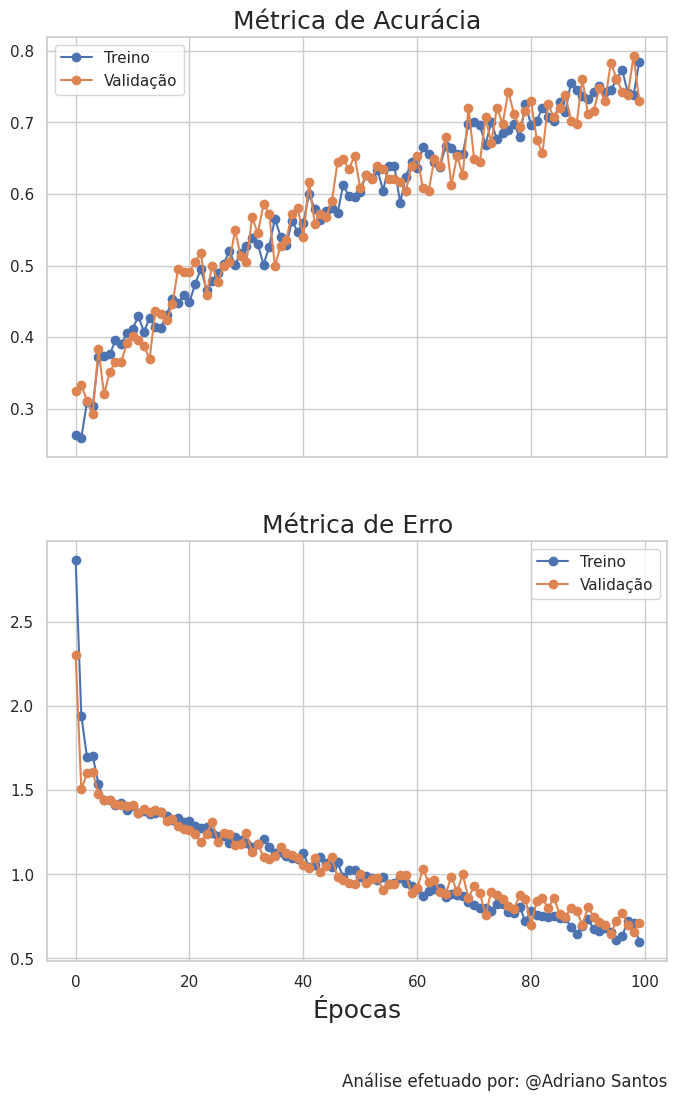

In [88]:
plot_metrics(history)

### <strong>Avaliando o Desempenho do Modelo com Métricas de Precisão de Treinamento e Validação</strong>

No código a seguir, está sendo exibida a precisão de treinamento e validação de um modelo de aprendizado de máquina. As informações são obtidas do histórico de treinamento (**history**) do modelo. A precisão de treinamento é impressa usando a chave **'`accuracy`'** e acessando o último valor da lista com **[-1]**, enquanto a precisão de validação é obtida da chave **'`val_accuracy`'** também com o último valor da lista. Essas métricas são úteis para avaliar o desempenho do modelo durante o treinamento e verificar se há `overfitting` ou `underfitting`.

In [96]:
accuracy_format = history.history['accuracy'][-1]
val_accuracy_format = history.history['val_accuracy'][-1]

display("Precisão do treinamento:   {:.2%}".format(accuracy_format))
display("Precisão de validação:     {:.2%}".format(val_accuracy_format))

'Precisão do treinamento:   78.49%'

'Precisão de validação:     72.97%'

# <font color=red><strong>Relatório de classificação</strong></font>

### <strong>Gerando o relatório de classificação a função `classification_report`</strong>

No código a seguir, está sendo importada a biblioteca **sklearn** com a função **classification_report** para avaliar a performance de um modelo de classificação. Primeiramente, são calculados os **rótulos_verdadeiros** e os **rótulos_previstos** a partir dos dados de validação. Os rótulos verdadeiros são obtidos através da função **argmax** aplicada sobre os rótulos de validação **y_validacao**, enquanto os rótulos previstos são gerados pela função **argmax** aplicada sobre as previsões do modelo **model.predict(x_validacao)**. Em seguida, é gerado o **relatório_classificacao** utilizando a função **classification_report** com os rótulos verdadeiros e previstos. Esse relatório contém métricas como precisão, recall, f1-score e suporte para cada classe de predição, fornecendo uma análise detalhada da performance do modelo. Por fim, o relatório de classificação de validação é exibido na tela através da função **print**. Este relatório é crucial para entender como o modelo está se comportando em termos de acurácia e identificar possíveis áreas de melhoria no processo de classificação.

In [103]:
from sklearn.metrics import classification_report

# Calcula os rótulos verdadeiros e previstos
rotulos_verdadeiros = np.argmax(y_validacao, axis=1)
rotulos_previstos = np.argmax(model.predict(x_validacao), axis=1)

# Gera o relatório de classificação
relatorio_classificacao = classification_report(rotulos_verdadeiros, rotulos_previstos)

# Exibe o relatório de classificação de validação
print("\n Relatório de classificação de validação:\n", relatorio_classificacao)

7/7 [==============================] - 2s 273ms/step

 Relatório de classificação de validação:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        44
           1       0.68      0.51      0.58        45
           2       0.56      0.61      0.59        44
           3       0.68      0.82      0.74        44
           4       0.98      0.93      0.95        45

    accuracy                           0.73       222
   macro avg       0.73      0.73      0.73       222
weighted avg       0.73      0.73      0.73       222



# <font color=red><strong>Modelo de teste</strong></font>

### <strong>Lendo e Exibindo um DataFrame Utilizando `Pandas`</strong>

No código a seguir, está sendo utilizado o **pandas** para ler um arquivo CSV chamado "`test.csv`" localizado no diretório "`../input/UBC-OCEAN/"`. Os dados são carregados em um dataframe chamado **test_data** e em seguida exibidos no ambiente de programação.

In [136]:
test_data = pd.read_csv('../input/UBC-OCEAN/test.csv')
display(test_data)

image_id  image_width  image_height
0        41        28469         16987

### <strong>Definindo um Caminho da Pasta de Miniaturas de Teste e Criando uma Nova Coluna</strong>

No código a seguir, está sendo definido o caminho da pasta de miniaturas de teste como **test_thumbnails_folder_path** e, em seguida, criada uma nova coluna no DataFrame **test_data** chamada '`full_path`'. Essa coluna é preenchida aplicando uma função lambda à coluna '`image_id`', que concatena o caminho da pasta de miniaturas de teste com o nome do arquivo de miniatura correspondente, utilizando a função **os.path.join** para garantir a correta formatação do caminho. Assim, cada entrada na coluna '`full_path`' contém o caminho completo para a miniatura correspondente ao ID da imagem na coluna '`image_id`' do DataFrame **test_data**.

In [137]:
caminho_pasta_miniaturas_teste = '../input/UBC-OCEAN/test_thumbnails'
test_data['full_path'] = test_data['image_id'].apply(lambda x: os.path.join(caminho_pasta_miniaturas_teste, f"{x}_thumbnail.png"))

### <strong>Criando uma Matriz de Teste para Imagens com Dimensões de 512 x 512 x 3 usando `numpy` e `PIL`</strong>

No código a seguir, está sendo criada uma matriz vazia **x_test** utilizando a biblioteca **numpy** com a forma especificada pelo comprimento dos dados de teste, tendo cada imagem com dimensões de 512x512 pixels e 3 canais de cor. Em seguida, é realizado um loop sobre os dados de teste, onde para cada índice e caminho completo de imagem na variável **test_data['full_path']**, a imagem é aberta, redimensionada para 512x512 pixels e convertida para o formato RGB utilizando a função **Image.open** da biblioteca **PIL**. A matriz **x_test** é então preenchida com os arrays de imagem obtidos. Por fim, é impressa a forma da matriz **x_test** para verificar suas dimensões.

In [138]:
x_teste = np.empty(shape=(len(test_data), 512, 512, 3), dtype=np.uint8)

for index, full_path in enumerate(test_data['full_path']):
    image_array = Image.open(full_path).resize((512, 512)).convert('RGB')
    x_teste[index] = image_array

print(x_teste.shape)

(1, 512, 512, 3)


### <strong>Fazendo previsões com o método `predict` sobre algumas imagens</strong>

No código a seguir, está sendo feita a previsão utilizando o modelo treinado (**model**) nos dados de teste (**x_test**), armazenando o resultado na variável **predictions**. Essa operação é comum em tarefas de aprendizado de máquina, onde o modelo já treinado é utilizado para fazer previsões em novos dados, neste caso, nos dados de teste. O resultado das previsões é então impresso na tela, mostrando as predições feitas pelo modelo.

In [139]:
predictions = model.predict(x_teste)
print('\n Previsões: \n', (predictions[0]))

1/1 [==============================] - 0s 25ms/step

 Previsões: 
 [0.0192888  0.12524636 0.08778532 0.73588645 0.03179313]


###  <strong>Criando um DataFrame de Submissão para Classificação de Imagens usando a função `argmax`</strong>

No código a seguir, está sendo realizado o processo de classificação de imagens utilizando um modelo de aprendizado de máquina. Primeiramente, é calculado o índice da classe prevista com maior probabilidade para cada imagem de teste, utilizando a função **argmax** aplicada ao array de predições. Em seguida, é criado um DataFrame de submissão contendo os IDs das imagens e as classes previstas. Os IDs das imagens são obtidos do conjunto de dados de teste, enquanto as classes previstas são representadas pelos índices calculados anteriormente. O DataFrame resultante, chamado **submission_df**, é utilizado para armazenar essas informações, facilitando a posterior análise e submissão dos resultados. Para realizar essas operações, é utilizada a biblioteca **pandas**, uma poderosa ferramenta para manipulação e análise de dados em Python.

In [140]:
test_data['label'] = predictions.argmax(axis=1)
submission_df = test_data[['image_id', 'label']]

### <strong>Mapeando Rótulos Numéricos para Rótulos Reais</strong>

No código a seguir, está sendo criado um mapeamento inverso dos rótulos, onde cada valor (v) do dicionário **reverse_label_mapping** é associado ao respectivo chave (k) do dicionário **label_mapping**. Em seguida, a função **`map`** é utilizada para substituir os rótulos numéricos no DataFrame **submission_df** pelos rótulos reais, usando o mapeamento inverso criado anteriormente. Essa operação permite traduzir os rótulos numéricos de volta para seus valores originais, facilitando a interpretação dos dados. Ao final, o DataFrame **submission_df** é exibido com os rótulos atualizados.

In [141]:
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
submission_df.loc[:, 'label'] = submission_df['label'].map(reverse_label_mapping)
display(submission_df)

image_id label
0        41  LGSC

### <strong>Salvando DataFrame em um Arquivo do Tipo CSV com a Função `to_csv`</strong>

No código a seguir, está sendo utilizado o método **to_csv** da biblioteca pandas para salvar o DataFrame **submission_df** em um arquivo CSV chamado 'submission.csv', sem incluir o índice das linhas no arquivo final. Este código é útil para exportar dados de um DataFrame pandas para um formato de arquivo CSV, facilitando o compartilhamento e a análise dos dados em outras plataformas.

In [142]:
submission_df.to_csv('SubmissionResNet50Aju.csv', index=False)

image_id label
0        41  LGSC